# Importing Required Libraries for Text Processing and Data Visualization

In this cell, we will import the necessary libraries for text analysis and data visualization:
- `pandas` for data manipulation.
- `matplotlib` and `seaborn` for creating visualizations.
- `re` for regular expressions used in text processing.
- `nltk` (Natural Language Toolkit) for text tokenization and stopword removal.


In [1]:
# Importing the necessary libraries

import pandas as pd  # pandas is used for data manipulation and analysis, particularly for handling data in DataFrames
import matplotlib.pyplot as plt  # matplotlib.pyplot is used for creating static, animated, and interactive visualizations in Python
import seaborn as sns  # seaborn is built on top of matplotlib and provides a high-level interface for drawing attractive statistical graphics
import re  # re is the regular expression library used for pattern matching and text manipulation
from nltk.tokenize import word_tokenize  # word_tokenize is used for tokenizing text into words, breaking down sentences into individual words
import nltk  # nltk (Natural Language Toolkit) is a library used for working with human language data (text)

nltk.download('stopwords')  # Download the 'stopwords' dataset from nltk, which contains common words that are often removed during text analysis (like 'the', 'is', etc.)
from nltk.corpus import stopwords  # Import stopwords corpus from nltk, which provides a list of common words that are not meaningful for analysis
nltk.download('punkt')  # Download 'punkt' data, which is a pre-trained tokenizer for splitting text into sentences or words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Clean Data

# Loading the Dataset

In this cell, we will load the dataset into a pandas DataFrame using `pd.read_csv()`. The dataset is stored in a CSV file, and we will specify its file path to read it into memory.


In [2]:
data = pd.read_csv('/content/Final_Data.csv')  # This reads the 'Final_Data.csv' file and loads it into a DataFrame named 'data'

# Previewing a Sample of the Dataset

This line fetches 10 random rows from the `data` DataFrame.

**Role**:
- It allows you to quickly inspect a random subset of the data instead of looking at the entire dataset.
- Useful for a quick check or spotting potential issues in the data.

**Effect**:
- It doesn't modify the data but provides a random sample for inspection.
.


In [3]:
data.sample(10)  # This returns 10 random rows from the 'data' DataFrame, allowing you to inspect a subset of the data

,review_description,rating,company
30879,برنامج حلو فكرتة ونتمني وضع مطاعم جديدة,positive,talbat
19122,هل يوصل الى المحافظات,positive,talbat
14753,حلو بس ياليت تضيفون توصيل مجاني عشان نشجع النا...,positive,talbat
17886,ن م,negative,talbat
37453,تطبيق سي وخدمه سيةه,negative,telecom_egypt
30912,وايد حلو ترى في قطر سريع,positive,talbat
30554,تطلب وانت بيتك ما تتحرك شي سهل ابرك من ما تصك ...,positive,talbat
9039,بكل صراحه وأمانه التوصيل بطي ولما تطلب كثير ما...,negative,talbat
20163,افضل برنامج طلب ... وخدمة العملاء رائعة,positive,talbat
9841,غاعز ئ ئ ففى على نبينا شره شو و mn.٢سسثى....، ...,neutral,talbat


# Previewing a Random Sample of the Data

`data.sample(10)`  # This returns 10 random rows from the 'data' DataFrame, allowing you to inspect a subset of the data.

**Role**:
- It allows you to quickly inspect a random subset of the data instead of looking at the entire dataset.
- Useful for a quick check or spotting potential issues in the data.

**Effect**:
- It doesn't modify the data but provides a random sample for inspection.



In [4]:
data.sample(10)  # This returns 10 random rows from the 'data' DataFrame, allowing you to inspect a subset of the data

,review_description,rating,company
2442,برنامج فاشل يتم خصم المبالغ من الفيزا ولم يتم ...,negative,talbat
32611,لا ارغب بهذا الاعلان ارجو عدم ظهورة مرة اخري,negative,swvl
22654,Im very very love you and thank you,positive,talbat
38533,ممكن ابعت فلوس لاي رقم شركه تانيه,positive,telecom_egypt
26501,راحة نفسية,positive,talbat
36401,عايز خط بيوصل دائري من بهتيم الي البنك الاهلي ...,negative,swvl
33642,كابتن ممتاز ومواعيد مظبوطه,positive,swvl
26420,تطبيق جميل وممتاز بس يتاخر فالطلب ويوصل بارد 🖒,positive,talbat
5890,كويس بس اسعار الديلفيري مبالغ فيه و احلى حاجة ...,positive,talbat
24034,المطاعم ترفع أسعارهم من أجل التوصيل,negative,talbat


# Checking the Shape of the Dataset

I`data.shape`  # This returns a tuple with the number of rows and columns in the 'data' DataFrame (rows, columns).

**Role**:
- It provides the dimensions of the DataFrame, showing how many rows and columns it contains.
- Useful for getting an overview of the size of the dataset.

**Effect**:
- It doesn’t change the data, just gives you information about its structure.



In [5]:
data.shape  # This returns a tuple with the number of rows and columns in the 'data' DataFrame (rows, columns)

(40046, 3)

# Getting Information About the Dataset

`data.info()`  # This provides a summary of the 'data' DataFrame, including the number of entries, column data types, and memory usage.

**Role**:
- It gives a quick overview of the DataFrame's structure, including the number of non-null entries, data types of each column, and memory usage.
- Useful for understanding the data at a glance, especially when checking for missing values or type issues.

**Effect**:
- It doesn’t modify the data but provides a concise summary of its structure and content.



In [6]:
data.info()  # This provides a summary of the 'data' DataFrame, including the number of entries, column data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40046 entries, 0 to 40045
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_description  40045 non-null  object
 1   rating              40046 non-null  object
 2   company             40046 non-null  object
dtypes: object(3)
memory usage: 938.7+ KB


# Descriptive Statistics of the Dataset

`data.describe()`  # This generates descriptive statistics for the numerical columns in 'data', such as count, mean, std, min, max, and percentiles.

**Role**:
- It provides summary statistics (like mean, standard deviation, min, max, and percentiles) for numerical columns in the DataFrame.
- Useful for understanding the distribution and spread of the numerical data.

**Effect**:
- It doesn’t alter the data but gives statistical insights into the numerical columns.



In [7]:
data.describe()  # This generates descriptive statistics for the numerical columns in 'data', such as count, mean, std, min, max, and percentiles

,review_description,rating,company
count,40045,40046,40046
unique,39003,3,12
top,ممتاز,positive,talbat
freq,16,23921,32073


# Checking for Missing Data

`missing_data = data.isnull().sum()`  # This checks each column for missing (null) values and sums the total number of missing values per column.

**Role**:
- It identifies the missing (null) values in each column of the DataFrame and sums them to give a total count of missing values per column.
- Useful for detecting and handling missing data.

**Effect**:
- It doesn't modify the data but provides a count of missing values for each column.

`print("Missing data: \n", missing_data)`  # This prints out the missing data information, showing the number of missing values for each column.

**Role**:
- It displays the result of the missing data check, showing how many missing values there are in each column.

**Effect**:
- It doesn’t change the data but helps you understand which columns have missing values and how many.



In [8]:
missing_data = data.isnull().sum()  # This checks each column for missing (null) values and sums the total number of missing values per column
print("Missing data: \n", missing_data)  # This prints out the missing data information, showing the number of missing values for each column

Missing data: 
 review_description    1
rating                0
company               0
dtype: int64


# Removing Missing Values

`data = data.dropna()`  # This removes any rows from 'data' that contain at least one missing value (null).

**Role**:
- It drops all rows that have at least one missing (null) value in any of the columns.
- Useful for cleaning the data by removing incomplete rows.

**Effect**:
- It modifies the DataFrame by removing rows with missing data, resulting in a dataset with only complete rows.



In [9]:
data = data.dropna()  # This removes any rows from 'data' that contain at least one missing value (null)

# Removing Duplicate Rows

`data = data.drop_duplicates()`  # This removes any rows that are exact duplicates of previous rows in the 'data' DataFrame.

**Role**:
- It removes any rows that are identical to previous ones, helping to clean up duplicate entries in the data.
- Useful for ensuring the dataset contains only unique rows.

**Effect**:
- It modifies the DataFrame by removing duplicate rows, ensuring that each row is unique.



In [10]:
data = data.drop_duplicates()  # This removes any rows that are exact duplicates of previous rows in the 'data' DataFrame

# Checking for Duplicate Entries in a Specific Column

`data['review_description'].duplicated().sum()`  # This checks for duplicate values in the 'review_description' column and counts the total number of duplicates.

**Role**:
- It identifies duplicate entries in the 'review_description' column and counts how many duplicates exist.
- Useful for detecting and quantifying duplicate values in a specific column.

**Effect**:
- It doesn't modify the data but provides the number of duplicate values in the 'review_description' column.



In [11]:
data['review_description'].duplicated().sum()  # This checks for duplicate values in the 'review_description' column and counts the total number of duplicates

1014

# Removing Duplicate Entries in the 'review_description' Column

`data = data.drop_duplicates(subset=['review_description'])`  # This removes rows with duplicate values in the 'review_description' column, keeping the first occurrence.

**Role**:
- It removes duplicate rows based on the 'review_description' column, retaining only the first occurrence of each unique value.
- Useful for eliminating redundancy in specific columns while keeping the first instance.

**Effect**:
- It modifies the DataFrame by dropping duplicates in the 'review_description' column, ensuring that only unique descriptions remain.



In [12]:
data = data.drop_duplicates(subset=['review_description'])  # This removes rows with duplicate values in the 'review_description' column, keeping the first occurrence

# Checking the Shape of the Dataset After Removing Duplicates

`data.shape`  # This returns a tuple with the number of rows and columns in the 'data' DataFrame (rows, columns).

**Role**:
- It provides the dimensions of the DataFrame, showing the total number of rows and columns.
- Useful for understanding the size of the dataset.

**Effect**:
- It doesn't change the data but gives a summary of the structure of the DataFrame (number of rows and columns).



In [13]:
data.shape  # This returns a tuple with the number of rows and columns in the 'data' DataFrame (rows, columns)

(39003, 3)

# Checking the Distribution of Ratings

`data['rating'].value_counts()`  # This returns a Series with the count of each unique value in the 'rating' column.

**Role**:
- It counts the occurrences of each unique value in the 'rating' column and returns a summary of the frequency distribution.
- Useful for understanding the distribution of values in the 'rating' column.

**Effect**:
- It doesn’t modify the data but provides a count of how many times each unique rating appears in the column.



In [14]:
data['rating'].value_counts()  # This returns a Series with the count of each unique value in the 'rating' column

,count
rating,
positive,23171
negative,13933
neutral,1899


# Removing Rows with 'Neutral' Ratings

`data = data[data['rating'] != 'neutral']`  # This filters the DataFrame to keep only rows where 'rating' is not 'neutral'.

**Role**:
- It filters the DataFrame by removing rows where the 'rating' column has the value 'neutral'.
- Useful for excluding specific categories or values from the dataset.

**Effect**:
- It modifies the DataFrame by removing rows with a 'neutral' rating, keeping only those with other ratings.



In [15]:
data = data[data['rating'] != 'neutral']  # This filters the DataFrame to keep only rows where 'rating' is not 'neutral'

# Checking the Updated Distribution of Ratings

`data['rating'].value_counts()`  # This returns a Series with the count of each unique value in the 'rating' column, showing the updated distribution after removing 'neutral' ratings.

**Role**:
- It provides the frequency count of each unique value in the 'rating' column, reflecting the changes after filtering out 'neutral' ratings.
- Useful for verifying how the distribution has changed after filtering.

**Effect**:
- It doesn’t alter the data but shows the updated distribution of ratings in the 'rating' column after the filter.


In [16]:
data['rating'].value_counts()  # This returns a Series with the count of each unique value in the 'rating' column, showing the updated distribution after removing 'neutral' ratings

,count
rating,
positive,23171
negative,13933


# Balancing Positive and Negative Ratings

In this cell, we are counting the number of 'positive' and 'negative' ratings in the dataset. Then, we check if their counts are equal. If there is an imbalance, we randomly drop samples from the larger group to balance the dataset. This step is useful when we want to ensure an equal distribution of positive and negative ratings for analysis or machine learning purposes.


In [17]:
# prompt: count positive = negative

# Count positive and negative ratings
positive_count = data[data['rating'] == 'positive'].shape[0]
negative_count = data[data['rating'] == 'negative'].shape[0]

print(f"Positive ratings: {positive_count}")
print(f"Negative ratings: {negative_count}")

# Check if counts are equal and adjust if needed
if positive_count > negative_count:
    diff = positive_count - negative_count
    data = data.drop(data[data['rating'] == 'positive'].sample(diff).index)
elif negative_count > positive_count:
    diff = negative_count - positive_count
    data = data.drop(data[data['rating'] == 'negative'].sample(diff).index)

# Verify the counts after adjustment
positive_count = data[data['rating'] == 'positive'].shape[0]
negative_count = data[data['rating'] == 'negative'].shape[0]

print(f"Adjusted positive ratings: {positive_count}")
print(f"Adjusted negative ratings: {negative_count}")

Positive ratings: 23171
Negative ratings: 13933
Adjusted positive ratings: 13933
Adjusted negative ratings: 13933


# Text Preprocessing

## Emoji and Emoticon Replacement

The code provided defines two dictionaries for replacing emojis and emoticons in text with corresponding descriptions. It then applies the `replace_emojis_emoticons` function to the `review_description` column in the `data` DataFrame.

### Process:
1. **Dictionaries Defined:**
   - Two dictionaries are created:
     - `emojis`: A dictionary mapping emoji characters to their corresponding text descriptions in Arabic.
     - `emoticons`: A dictionary mapping emoticons to their corresponding emoji characters.
   
2. **Function Application:**
   - The function `replace_emojis_emoticons` is defined to replace all occurrences of emojis and emoticons in the review text with the corresponding descriptions or emoji characters.
   
3. **Application to Dataset:**
   - The `replace_emojis_emoticons` function is applied to the `review_description` column of the `data` DataFrame, ensuring that all emojis and emoticons are replaced with their textual representations.

This preprocessing step helps in cleaning the text data by transforming visual elements (emojis and emoticons) into words, making it easier to analyze the sentiment or perform other text-based tasks.


In [18]:
# Dictionaries for emoji and emoticon replacement
emojis = {
    "🙂":" يبتسم ",
    "😂":" يضحك ",
    "💔":" قلب حزين ",
    "🙂":" يبتسم ",
    "❤️":" حب ",
    "❤":" حب ",
    "😍":" حب ",
    "😭":" يبكي ",
    "😢":" حزن ",
    "😔":" حزن ",
    "♥":" حب ",
    "💜":" حب ",
    "😅":" يضحك ",
    "🙁":" حزين ",
    "💕":" حب ",
    "💙":" حب ",
    "😞":" حزين ",
    "😊":" سعادة ",
    "👏":" يصفق ",
    "👌":" احسنت ",
    "😴":" ينام ",
    "😀":" يضحك ",
    "😌":" حزين ",
    "🌹":" وردة ",
    "🙈":" حب ",
    "😄":" يضحك ",
    "😐":" محايد ",
    "✌":" منتصر ",
    "✨":" نجمه ",
    "🤔":" تفكير ",
    "😏":" يستهزء ",
    "😒":" يستهزء ",
    "🙄":" ملل ",
    "😕":" عصبية ",
    "😃":" يضحك ",
    "🌸":" وردة ",
    "😓":" حزن ",
    "💞":" حب ",
    "💗":" حب ",
    "😑":" منزعج ",
    "💭":" تفكير ",
    "😎":" ثقة ",
    "💛":" حب ",
    "😩":" حزين ",
    "💪":" عضلات ",
    "👍":" موافق ",
    "🙏🏻":" رجاء طلب ",
    "😳":" مصدوم ",
    "👏🏼":" تصفيق ",
    "🎶":" موسيقي ",
    "🌚":" صمت ",
    "💚":" حب ",
    "🙏":" رجاء طلب ",
    "💘":" حب ",
    "🍃":" سلام ",
    "☺":" يضحك ",
    "🐸":" ضفدع ",
    "😶":" مصدوم ",
    "✌️":" مرح ",
    "✋🏻":" توقف ",
    "😉":" غمزة ",
    "🌷":" حب ",
    "🙃":" مبتسم ",
    "😫":" حزين ",
    "😨":" مصدوم ",
    "🎼 ":" موسيقي ",
    "🍁":" مرح ",
    "🍂":" مرح ",
    "💟":" حب ",
    "😪":" حزن ",
    "😆":" يضحك ",
    "😣":" استياء ",
    "☺️":" حب ",
    "😱":" كارثة ",
    "😁":" يضحك ",
    "😖":" استياء  ",
    "🏃🏼":" يجري ",
    "😡":" غضب ",
    "🚶":" يسير ",
    "🤕":" مرض ",
    "‼️":" تعجب ",
    "🕊":" طائر ",
    "👌🏻":" احسنت ",
    "❣":" حب ",
    "🙊":" مصدوم ",
    "💃":" سعادة مرح ",
    "💃🏼":" سعادة مرح ",
    "😜":" مرح ",
    "👊":" ضربة ",
    "😟":" استياء ",
    "💖":" حب ",
    "😥":" حزن ",
    "🎻":" موسيقي ",
    "✒":" يكتب ",
    "🚶🏻":" يسير ",
    "💎":" الماظ ",
    "😷":" وباء مرض ",
    "☝":" واحد ",
    "🚬":" تدخين ",
    "💐" : " ورد ",
    "🌞" : " شمس ",
    "👆" : " الاول ",
    "⚠️" :" تحذير ",
    "🤗" : " احتواء ",
    "✖️": " غلط ",
    "📍"  : " مكان ",
    "👸" : " ملكه ",
    "👑" : " تاج ",
    "✔️" : " صح ",
    "💌": " قلب ",
    "😲" : " مندهش ",
    "💦": " ماء ",
    "🚫" : " خطا ",
    "👏🏻" : " برافو ",
    "🏊" :" يسبح ",
    "👍🏻": " تمام ",
    "⭕️" :" دائره كبيره ",
    "🎷" : " ساكسفون ",
    "👋": " تلويح باليد ",
    "✌🏼": " علامه النصر ",
    "🌝":" مبتسم ",
    "➿"  : " عقده مزدوجه ",
    "💪🏼" : " قوي ",
    "📩":  " تواصل معي ",
    "☕️": " قهوه ",
    "😧" : " قلق و صدمة ",
    "🗨": " رسالة ",
    "❗️" :" تعجب ",
    "🙆🏻": " اشاره موافقه ",
    "👯" :" اخوات ",
    "©" :  " رمز ",
    "👵🏽" :" سيده عجوزه ",
    "🐣": " كتكوت ",
    "🙌": " تشجيع ",
    "🙇": " شخص ينحني ",
    "👐🏽":" ايدي مفتوحه ",
    "👌🏽": " بالظبط ",
    "⁉️" : " استنكار ",
    "⚽️": " كوره ",
    "🕶" :" حب ",
    "🎈" :" بالون ",
    "🎀":    " ورده ",
    "💵":  " فلوس ",
    "😋":  " جائع ",
    "😛":  " يغيظ ",
    "😠":  " غاضب ",
    "✍🏻":  " يكتب ",
    "🌾":  " ارز ",
    "👣":  " اثر قدمين ",
    "❌":" رفض ",
    "🍟":" طعام ",
    "👬":" صداقة ",
    "🐰":" ارنب ",
    "☂":" مطر ",
    "⚜":" مملكة فرنسا ",
    "🐑":" خروف ",
    "🗣":" صوت مرتفع ",
    "👌🏼":" احسنت ",
    "☘":" مرح ",
    "😮":" صدمة ",
    "😦":" قلق ",
    "⭕":" الحق ",
    "✏️":" قلم " ,
    "ℹ":" معلومات ",
    "🙍🏻":" رفض ",
    "⚪️":" نضارة نقاء ",
    "🐤":" حزن ",
    "💫":" مرح ",
    "💝":" حب ",
    "🍔":" طعام ",
    "❤︎":" حب ",
    "✈️":" سفر ",
    "🏃🏻‍♀️":" يسير ",
    "🍳":" ذكر ",
    "🎤":" مايك غناء ",
    "🎾":" كره ",
    "🐔":" دجاجة ",
    "🙋":" سؤال ",
    "📮":" بحر ",
    "💉":" دواء ",
    "🙏🏼":" رجاء طلب ",
    "💂🏿 ":" حارس ",
    "🎬":" سينما ",
    "♦️":" مرح ",
    "💡":" قكرة ",
    "‼":" تعجب ",
    "👼":" طفل ",
    "🔑":" مفتاح ",
    "♥️":" حب ",
    "🕋":" كعبة ",
    "🐓":" دجاجة ",
    "💩":" معترض ",
    "👽":" فضائي ",
    "☔️":" مطر ",
    "🍷":" عصير ",
    "🌟":" نجمة ",
    "☁️":" سحب ",
    "👃":" معترض ",
    "🌺":" مرح ",
    "🔪":" سكينة ",
    "♨":" سخونية ",
    "👊🏼":" ضرب ",
    "✏":" قلم ",
    "🚶🏾‍♀️":" يسير ",
    "👊":" ضربة ",
    "◾️":" وقف ",
    "😚":" حب ",
    "🔸":" مرح ",
    "👎🏻":" لا يعجبني ",
    "👊🏽":" ضربة ",
    "😙":" حب ",
    "🎥":" تصوير ",
    "👉":" جذب انتباه ",
    "👏🏽":" يصفق ",
    "💪🏻":" عضلات ",
    "🏴":" اسود ",
    "🔥":" حريق ",
    "😬":" عدم الراحة ",
    "👊🏿":" يضرب ",
    "🌿":" ورقه شجره ",
    "✋🏼":" كف ايد ",
    "👐":" ايدي مفتوحه ",
    "☠️":" وجه مرعب ",
    "🎉":" يهنئ ",
    "🔕" :" صامت ",
    "😿":" وجه حزين ",
    "☹️":" وجه يائس ",
    "😘" :" حب ",
    "😰" :" خوف و حزن ",
    "🌼":" ورده ",
    "💋":  " بوسه ",
    "👇":" لاسفل  ",
    "❣️":" حب ",
    "🎧":" سماعات ",
    "📝":" يكتب ",
    "😇":" دايخ ",
    "😈":" رعب ",
    "🏃":" يجري ",
    "✌🏻":" علامه النصر ",
    "🔫":" يضرب ",
    "❗️":" تعجب ",
    "👎":" غير موافق ",
    "🔐":" قفل ",
    "👈":" لليمين ",
    "™":" رمز ",
    "🚶🏽":" يتمشي ",
    "😯":" متفاجأ ",
    "✊":" يد مغلقه ",
    "😻":" اعجاب ",
    "🙉" :" قرد ",
    "👧":" طفله صغيره ",
    "🔴":" دائره حمراء ",
    "💪🏽":" قوه ",
    "💤":" ينام ",
    "👀":" ينظر ",
    "✍🏻":" يكتب ",
    "❄️":" تلج ",
    "💀":" رعب ",
    "😤":" وجه عابس ",
    "🖋":" قلم ",
    "🎩":" كاب ",
    "☕️":" قهوه ",
    "😹":" ضحك ",
    "💓":" حب  ",
    "☄️ ":" نار ",
    "👻":" رعب ",
    "❎":" خطء ",
    "🤮":" حزن ",
    '🏻':" احمر ",
    "💧":"دمعة",
    "🌳":"شجره",
    "🖤" : "قلب اسود",
    "🌂" :"شمسيه",
    "🥺⃢" : " كيوت",
    "❄" : " تلج",
    "🎃" : "يقطينة",
    "🤪": "مجنون",
    "✅ ": "علامة صح",
    "👰" : "عروس",
    "😗" : "وجه يقبل",
    "🎁" : "هدية" ,
    "🤝" : "مصافحة",
    "💯" : "مئة في المئة",
    "🤯" :"ذهول" ,
    "🦛" : "فرس النهر",
    "🦄": "حصان الوحيد القرن",
    "🦓":"حمار وحشي",
    "🐴" :"حصان",
    "🥰":"وجه بعيون القلب",
    "👅" : "لسان",
    "👄" : "شفاه",
    "🤴" : "أمير",
    "🚮": "سلة مهملات",
    "🤩":"وجه بعيون نجمية",
    "🛑": "إشارة توقف",
    "✋":"يد مرفوعة",
}

emoticons = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "موسيقي",
    "♡" : "❤",
    "☻"  : "🙂",
}

def replace_emojis_emoticons(text):
    # Replace emojis with text and add a space after each replacement
    for emoji, word in emojis.items():
        text = text.replace(emoji, word + " ")

    # Replace emoticons
    for emoticon, emoji in emoticons.items():
        text = re.sub(re.escape(emoticon), emoji + " ", text)

    return text

data['review_description'] = data['review_description'].apply(replace_emojis_emoticons)

#### Downloading the 'punkt_tab' Dataset:
The command `nltk.download('punkt_tab')` downloads the `punkt_tab` dataset from the NLTK library. This dataset contains the necessary tokenization models and dictionaries for accurately splitting sentences and words.

#### Applying the `word_tokenize` Function:
`data['tokens'] = data['review_description'].apply(word_tokenize)` applies the `word_tokenize` function to each entry in the `review_description` column of the DataFrame (called `data`).
This function splits the text in each review into individual words and stores them in a new column called `tokens`.

The result will be that the `tokens` column contains a list of words for each review in the dataset.
### Role:

- The `nltk.download('punkt_tab')` command downloads the 'punkt_tab' tokenizer model from the NLTK library, which is used for tokenizing text.
- The `word_tokenize` function splits the `review_description` text into individual words (tokens).
- The `.apply(word_tokenize)` function is applied to the `review_description` column to tokenize each row of the data.

### Effect:

- The text in the `review_description` column is split into individual words (tokens) and stored in a new column called `tokens`.
- This operation converts each description in the `review_description` column into a list of words, which is useful for text analysis or NLP tasks.



In [19]:
# Download the 'punkt_tab' dataset from the NLTK library
nltk.download('punkt_tab')

# Apply the word_tokenize function to the 'review_description' column in the DataFrame
data['tokens'] = data['review_description'].apply(word_tokenize)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#### `remove_stopwords` Function:
### Role:

- The function `remove_stopwords(text)` removes specific stopwords (common words like 'لا', 'ليس', 'ما', etc.) from a list of words.
- If the input is a list of words, it filters out the words that are in the predefined stopwords list.
- If the input is not a list (e.g., a string), it returns the original text unchanged.

### Effect:

- The `review_description` column is updated by applying the `remove_stopwords` function to the `tokens` column.
- Words from the `tokens` column that match any of the predefined stopwords are removed.
- The resulting text is a cleaner version with fewer unnecessary words for further analysis.



In [20]:
# Function to remove stopwords from the text
def remove_stopwords(text):
    if isinstance(text, list):
        return [word for word in text if word not in ['لا', 'ليس', 'ما', 'لم', 'لن', 'بالتأكيد', 'حقًا', 'إلا', 'غير', 'فقط', 'مجرد', 'رغم', 'لكن', 'بالرغم', 'مع ذلك', 'ربما', 'قد', 'حتى', 'سوى']]
    return text

# Apply the remove_stopwords function to the 'tokens' column
data['review_description'] = data['tokens'].apply(remove_stopwords)


### Code Explanation:
### Role:

- This function `joined(text)` checks if the input is a list. If it is, it joins the words in the list into a single string, separated by spaces.
- It uses `" ".join(text)` to combine the list elements into one string.
- If the input is not a list, it simply returns the original text.

### Effect:

- The `review_description` column is updated by applying the `joined` function.
- If any value in `review_description` is a list, it will be converted into a single string with words separated by spaces.
- If the value is already a string, it remains unchanged.



In [21]:
# Function to join words into a single string
def joined(text):
    if isinstance(text, list):
        return " ".join(text)
    return text

# Apply the joined function to the 'review_description' column
data['review_description'] = data['review_description'].apply(joined)


### Explanation:
### Role:

- This line removes the `tokens` column from the `data` DataFrame.
- The `drop()` function is used to remove specified labels (columns or rows).
- The `columns=['tokens']` argument ensures that it targets the column named `tokens` for removal.

### Effect:

- The `tokens` column is no longer part of the DataFrame after this operation.
- The data in the `tokens` column is discarded, and the DataFrame is updated without this column.


In [22]:
# Dropping the 'tokens' column from the DataFrame
data = data.drop(columns=['tokens'])


#### `Normalize` Function:
### Role:

- The `Normalize` function is designed to clean and normalize Arabic text by applying multiple text processing steps.
- It removes diacritics (harakat), normalizes different variations of Arabic letters (like Alif, Ta, Ya), and removes unwanted characters such as digits, punctuation, and non-Arabic characters.
- The `re.sub()` function is used in the `Normalize` function to perform text replacements using regular expressions.

### Effect:

- The function standardizes Arabic text by making it uniform in terms of letter variations and removing irrelevant elements, such as punctuation and numbers.
- After applying this function to a text column in a DataFrame, the resulting text will be cleaner, more consistent, and suitable for further natural language processing (NLP) tasks.



In [23]:
import re

# Function to normalize Arabic text
def Normalize(text):
    # Remove diacritics (harakat)
    text = re.sub(r'[\u064B-\u065F]', '', text)
    # Normalize Alif variations (إأآا)
    text = re.sub(r'[إأآا]', 'ا', text)
    # Normalize the Arabic letter 'ta' (ة -> ه)
    text = re.sub(r'ة', 'ه', text)
    # Normalize the Arabic letter 'ya' (ى -> ي)
    text = re.sub(r'ى', 'ي', text)
    # Normalize the Arabic letter 'waw' (ؤ -> و)
    text = re.sub(r'ؤ', 'و', text)
    # Normalize the Arabic letter 'hamza' (ءأ -> ا)
    text = re.sub(r'[ءأ]', 'ا', text)
    # Remove duplicated characters (like "اا")
    text = re.sub(r'(.)\1+', r'\1', text)
    # Remove extra spaces between words
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove punctuation marks
    text = re.sub(r'[!.,;\'\[\]\(\)\{\}\?\":\-–—_]', '', text)
    # Remove non-Arabic characters (like Latin letters)
    text = re.sub(r'[^ء-ي ]', '', text)

    return text

# Apply the Normalize functio


### Code Explanation:

- `data.isnull().sum()`: This checks for missing values (NaN) in the DataFrame (`data`). The `isnull()` function returns a DataFrame of the same shape as `data`, where each cell is `True` if the value is missing (NaN) and `False` otherwise. The `sum()` function then counts the number of `True` values (missing values) for each column.
### Role:

- This line checks for missing data (NaN or None values) in the `data` DataFrame using the `isnull().sum()` function.
- The `isnull()` function returns a DataFrame of boolean values indicating whether each element is missing.
- The `sum()` function is used to count the number of missing values in each column of the DataFrame.

### Effect:

- The `missing_data` variable will contain the count of missing values in each column.
- It provides an overview of which columns in the DataFrame contain missing values and how many missing entries are present


In [24]:
# Check for missing data in the DataFrame
missing_data = data.isnull().sum()
print("Missing data:", missing_data)


Missing data: review_description    0
rating                0
company               0
dtype: int64


### Code Explanation:

### Role:

- This line checks for duplicate rows in the `data` DataFrame using the `duplicated()` method.
- The `duplicated()` function returns a boolean Series where `True` indicates a duplicate row, and `False` indicates a unique row.
- The `sum()` function counts how many `True` values are present, i.e., how many duplicate rows exist.

### Effect:

- The `duplicate_data` variable will contain the number of duplicate rows in the DataFrame.
- This allows you to quickly identify if there are any duplicate entries that need to be removed or handled before further analysis or modeling.
- It prints the total count of duplicate rows, providing a quick assessment of data quality.


In [25]:
# Check for duplicate rows in the DataFrame
duplicate_data = data.duplicated().sum()  # 'duplicated()' identifies duplicate rows, and 'sum()' counts how many duplicates there are

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_data)  # This will output the total number of duplicate rows in the DataFrame


Number of duplicate rows: 151


### Code Explanation:

- `data.drop_duplicates()` removes any duplicate rows from the DataFrame (`data`).
- This method returns a new DataFrame with the duplicate rows dropped, keeping only the first occurrence of each unique row.
As a result, the DataFrame (`data`) will no longer contain duplicate rows.

**Role:**
- **Purpose:** This line removes any rows that are identical to another row in the DataFrame. It ensures that only unique rows are retained.
- **Method:** The `.drop_duplicates()` method identifies duplicate rows and eliminates them. By default, it keeps the first occurrence of each duplicated row and removes subsequent duplicates.

**Effect:**
:The DataFrame is updated, and all duplicate rows are removed, keeping only the first instance of each.
- This operation does not modify the original `data` DataFrame unless the result is reassigned, which is why `data = data.drop_duplicates()` is used to update the DataFrame with the cleaned data.



In [26]:
# Removing duplicate rows from the DataFrame
data = data.drop_duplicates()  # This line removes any duplicate rows, ensuring the DataFrame contains only unique entries.


### Code Explanation:

**Role:**

- **Purpose:** This code extracts and displays the unique values from the 'rating' and 'company' columns in the DataFrame.
- **Method:**
  - `data['rating'].unique()` fetches the unique values in the 'rating' column and returns them as an array.
  - `data['company'].unique()` fetches the unique values in the 'company' column and returns them as an array.
- **Effect:**
  - The code prints the unique categories (values) present in both the 'rating' and 'company' columns.
  - This is useful for understanding the distinct values in these columns, such as the different ratings or company names present in the dataset.



In [27]:
# Get unique values in the 'rating' column
rating_categories = data['rating'].unique()  # 'unique()' returns an array of unique values from the 'rating' column
print("Categories in 'rating':", rating_categories)  # Print the unique categories in the 'rating' column

# Get unique values in the 'company' column
company_categories = data['company'].unique()  # 'unique()' returns an array of unique values from the 'company' column
print("Categories in 'company':", company_categories)  # Print the unique categories in the 'company' column


Categories in 'rating': ['positive' 'negative']
Categories in 'company': ['talbat' 'swvl' 'venus' 'Raya' 'telecom_egypt' 'hilton' 'domty' 'nestle'
 'elsewedy' 'capiter' 'TMG' 'Ezz Steel']


**Role:**
- **`data.sample(10)`**: This function randomly selects 10 rows from the DataFrame (`data`). It is useful when you want to quickly inspect a subset of the data. The number `10` specifies how many rows to sample.

- **Purpose:** This line randomly selects 10 rows from the DataFrame for a quick inspection of the data.
- **Method:**
  - `data.sample(10)` selects 10 random rows from the DataFrame 'data'.
  - The number 10 is passed as an argument to the `sample()` function to specify how many rows to randomly select.
- **Effect:**
  - The code provides a random subset of 10 rows from the DataFrame, which helps in getting a quick overview of the data without having to look at the entire dataset.
  - This can be particularly useful to check for any anomalies or patterns in the data.



In [28]:
# Sample 10 random rows from the DataFrame
data.sample(10)  # The 'sample(10)' function selects 10 random rows from the DataFrame 'data' to give a quick overview of the data


,review_description,rating,company
7577,غالي التوصيل,negative,talbat
37255,التطبيق يعمل بشكل جيد,positive,telecom_egypt
32117,ممتازة عدى ادخال الباسوورد كل مرة و لو اتبعت ج...,negative,swvl
10566,خدمة ممتازة وخصومات عفق ... بأسبوع الشاورما قض...,positive,talbat
6572,اعطو الموظفين حقوقهم الشركات بترفع التسعيره وا...,negative,talbat
12560,اجمل تطبيق ولله حريق,positive,talbat
14551,ممتاز جدا والطعام جيدا ودايما فريش و ساخن,positive,talbat
20882,ادري الحين تم الطلب ولا,negative,talbat
2626,عندي قسائم وما بقدر استخدمها يرجى الاتصال بي ع...,negative,talbat
34630,خدمه اكثر من رائعة,positive,swvl


# EDA

**Role:**

- **Purpose:** This code imports two popular libraries for data visualization: `matplotlib.pyplot` and `seaborn`.
  - `matplotlib.pyplot`: A module in the Matplotlib library used to create various types of plots and graphs.
  - `seaborn`: A data visualization library built on top of Matplotlib, offering a high-level interface for creating attractive and informative statistical plots.

- **Method:**
  - `import matplotlib.pyplot as plt`: Imports the `matplotlib.pyplot` module and assigns it the alias `plt`, which is commonly used in the Python community for plotting.
  - `import seaborn as sns`: Imports the `seaborn` library and assigns it the alias `sns`, which is commonly used for creating statistical visualizations with more aesthetic designs than basic Matplotlib.

- **Effect:**
  - The code makes the `matplotlib.pyplot` and `seaborn` libraries available for use in the script, enabling the creation of various plots and charts to visualize data in a more effective and attractive way.
  - With these libraries, you can create visualizations such as line plots, bar charts, histograms, box plots, and more, helping to gain insights from the data.


In [29]:
# Importing the matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt  # Used for creating various types of plots and graphs

# Importing the seaborn library for statistical data visualization
import seaborn as sns  # Built on top of matplotlib, provides high-level interface for attractive and informative visualizations


### Code Explanation:
**Role:**

- **Purpose:** This code creates a bar plot (using Seaborn) to show the distribution of values in the 'rating' column from the DataFrame `data`.
  - The `countplot` function is used to display the frequency (count) of each unique value in the 'rating' column.

- **Method:**
  - `plt.figure(figsize=(8, 6))`: Sets the size of the figure (the plot) to be 8 inches wide and 6 inches high.
  - `sns.countplot(x='rating', data=data, palette='viridis')`:
    - Creates a count plot for the 'rating' column.
    - The `x='rating'` specifies that the x-axis should represent the 'rating' column.
    - The `data=data` argument tells the function which DataFrame to use.
    - The `palette='viridis'` argument specifies the color palette to use, in this case, 'viridis', which is a perceptually uniform color palette.
  - `plt.title('Distribution of Ratings')`: Adds a title to the plot, describing the content.
  - `plt.xlabel('Rating')`: Sets the label for the x-axis as 'Rating', which represents the different rating values.
  - `plt.ylabel('Count')`: Sets the label for the y-axis as 'Count', which represents how many times each rating appears in the data.

- **Effect:**
  - A bar chart is generated, displaying the distribution of ratings in the 'rating' column of the `data` DataFrame.
  - The plot will show how many occurrences there are for each rating category, making it easier to visualize the frequency distribution.



<ipython-input-30-72329543f69a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data, palette='viridis')  # 'countplot' plots the frequency of each unique value in the 'rating' column, using the 'viridis' color palette


Text(0, 0.5, 'Count')

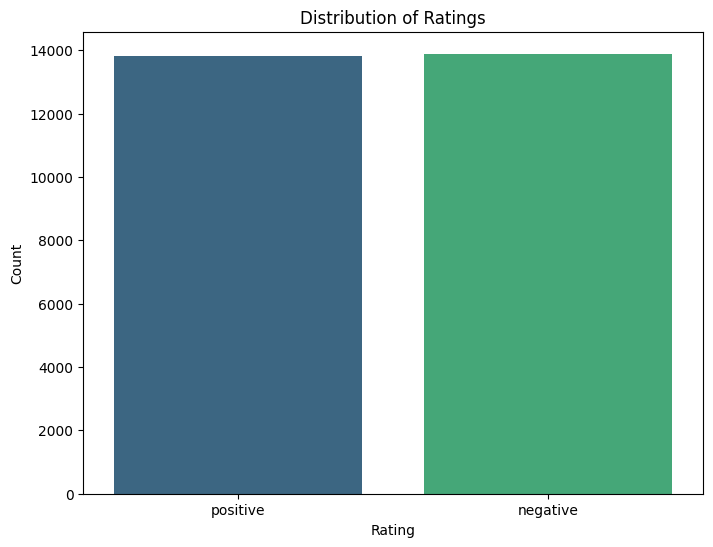

In [30]:
# Set the size of the figure (plot)
plt.figure(figsize=(8, 6))  # Defines the size of the plot as 8 inches wide and 6 inches high

# Create a countplot for the 'rating' column in the DataFrame
sns.countplot(x='rating', data=data, palette='viridis')  # 'countplot' plots the frequency of each unique value in the 'rating' column, using the 'viridis' color palette

# Set the title of the plot
plt.title('Distribution of Ratings')  # Adds a title to the plot

# Set the label for the x-axis
plt.xlabel('Rating')  # Labels the x-axis as 'Rating'

# Set the label for the y-axis
plt.ylabel('Count')  # Labels the y-axis as 'Count' (the number of occurrences of each rating)


### Code Explanation:
**Role:**

- **Purpose:** This code generates a bar plot showing the distribution of companies in the 'company' column from the `data` DataFrame.
  - It uses the `countplot` function to visualize the frequency of each unique company value.

- **Method:**
  - `plt.figure(figsize=(12, 6))`: Sets the size of the plot to 12 inches wide and 6 inches high.
  - `sns.countplot(x='company', data=data, palette='Set2')`:
    - Creates a count plot for the 'company' column.
    - The `x='company'` argument tells the plot to use the 'company' column for the x-axis.
    - The `data=data` argument specifies the DataFrame from which to get the data.
    - The `palette='Set2'` argument sets the color palette to 'Set2', which is one of Seaborn's predefined color schemes.
  - `plt.title('Distribution of Companies')`: Adds a title to the plot, indicating that the chart shows the distribution of companies.
  - `plt.xlabel('Company')`: Labels the x-axis as 'Company', representing the different companies.
  - `plt.ylabel('Count')`: Labels the y-axis as 'Count', which represents how many times each company appears in the data.
  - `plt.xticks(rotation=45)`: Rotates the x-axis labels by 45 degrees to improve readability, especially if company names are long.
  - `plt.show()`: Displays the plot on the screen.

- **Effect:**
  - A bar chart is created, showing the frequency of each company in the 'company' column.
  - The plot makes it easy to compare how many times each company appears in the dataset, and rotating the x-axis labels helps in displaying longer company names without overlap.



<ipython-input-31-cbbaa800d0ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='company', data=data, palette='Set2')  # 'countplot' plots the frequency of each unique value in the 'company' column, using the 'Set2' color palette


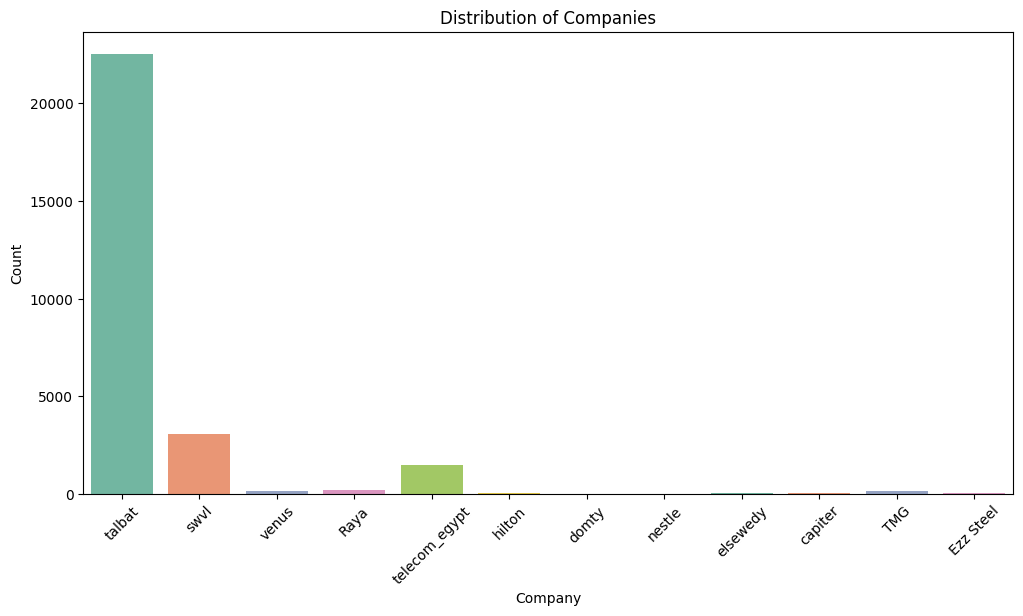

In [31]:
# Set the size of the figure (plot)
plt.figure(figsize=(12, 6))  # Defines the size of the plot as 12 inches wide and 6 inches high

# Create a countplot for the 'company' column in the DataFrame
sns.countplot(x='company', data=data, palette='Set2')  # 'countplot' plots the frequency of each unique value in the 'company' column, using the 'Set2' color palette

# Set the title of the plot
plt.title('Distribution of Companies')  # Adds a title to the plot

# Set the label for the x-axis
plt.xlabel('Company')  # Labels the x-axis as 'Company'

# Set the label for the y-axis
plt.ylabel('Count')  # Labels the y-axis as 'Count' (the number of occurrences of each company)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees

# Display the plot
plt.show()  # Shows the plot


# Simple Explanation of the Code

**Role:**

- **Purpose:** This code creates a grouped bar chart to visualize the feedback distribution by company. It shows the number of positive and negative feedbacks for each company.
  - The `countplot` is grouped by the 'rating' column, using the 'company' column on the x-axis.

- **Method:**
  - `plt.figure(figsize=(14, 8))`: Sets the size of the plot to 14 inches wide and 8 inches high for better clarity and space.
  - `sns.countplot(x='company', hue='rating', data=data)`:
    - `x='company'` places the company names on the x-axis.
    - `hue='rating'` separates the data by the 'rating' column, which can represent feedback types such as 'positive' and 'negative'.
  - `plt.title('Companies vs Feedbacks', fontsize=16)`: Sets the title of the plot as 'Companies vs Feedbacks' with font size 16.
  - `plt.xlabel('Company', fontsize=14)`: Labels the x-axis with the title 'Company' using font size 14.
  - `plt.ylabel('Feedback Count', fontsize=14)`: Labels the y-axis with 'Feedback Count' using font size 14 to indicate the number of feedbacks.
  - `plt.xticks(rotation=45, ha='right', fontsize=12)`: Rotates the x-axis labels by 45 degrees for better readability and aligns them to the right. Font size is set to 12.
  - `plt.legend(title='Feedback Type', labels=['Positive', 'Negative'], fontsize=12)`:
    - Adds a legend with the title 'Feedback Type' and custom labels 'Positive' and 'Negative' to distinguish the feedback types.
    - Font size for the legend is set to 12.
  - `plt.tight_layout()`: Automatically adjusts the layout to avoid any overlap between the plot elements.

- **Effect:**
  - This code produces a grouped bar chart where each company is represented on the x-axis, with bars indicating the number of positive and negative feedbacks. The legend helps identify the feedback type for each bar.
  - The plot’s appearance is adjusted for readability, including rotated x-axis labels and a neatly formatted layout.



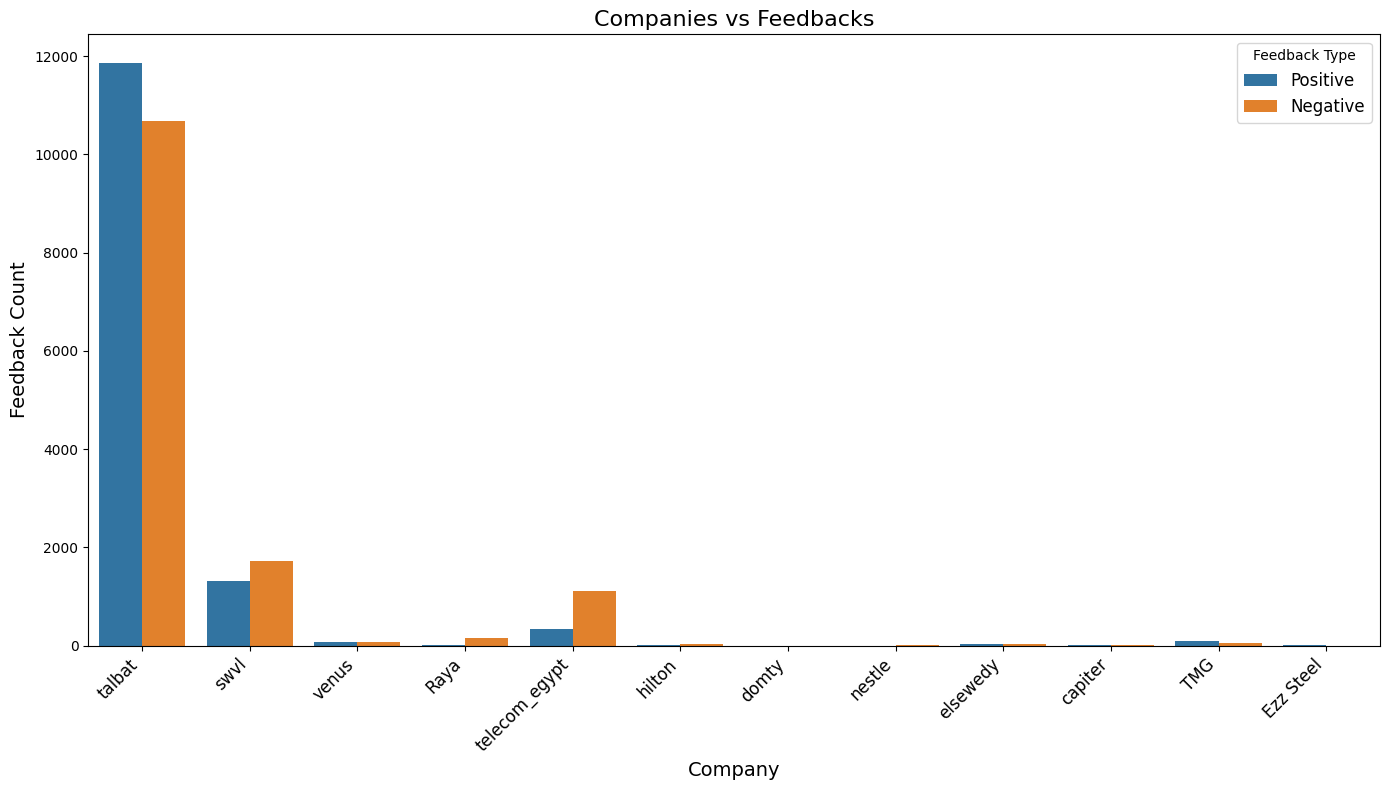

In [32]:
# Set the size of the figure (plot)
plt.figure(figsize=(14, 8))  # Defines the size of the plot as 14 inches wide and 8 inches high

# Create a countplot with 'company' on the x-axis and group data by 'rating'
ax = sns.countplot(x='company', hue='rating', data=data)
# 'hue' groups the data by the 'rating' column, showing a breakdown of feedback (e.g., positive vs. negative) for each company

# Add a title to the plot
plt.title('Companies vs Feedbacks', fontsize=16)  # Sets the title of the plot with font size 16

# Set the label for the x-axis
plt.xlabel('Company', fontsize=14)  # Labels the x-axis as 'Company' with font size 14

# Set the label for the y-axis
plt.ylabel('Feedback Count', fontsize=14)  # Labels the y-axis as 'Feedback Count' with font size 14

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
# Rotates the labels on the x-axis by 45 degrees, aligns them to the right ('ha' = horizontal alignment), and sets the font size to 12

# Add a legend to the plot
plt.legend(title='Feedback Type', labels=['Positive', 'Negative'], fontsize=12)
# Sets the legend title to 'Feedback Type' and customizes the labels for positive and negative ratings, with font size 12

# Adjust the layout to avoid overlap
plt.tight_layout()  # Automatically adjusts subplot parameters to give padding between plots and avoid overlap

#


# Code Explanation: Review Length Distribution

**Role:**

- **Purpose:** This code creates a histogram to visualize the distribution of the lengths of the reviews in terms of the number of words.
  - The `review_length` column is created to store the number of words in each review.
  - A histogram is then plotted to show how the review lengths are distributed.

- **Method:**
  - `data['review_length'] = data['review_description'].apply(lambda x: len(str(x).split()))`:
    - This line creates a new column called 'review_length'. It calculates the number of words in each review by splitting the 'review_description' string into words and counting the length of the resulting list.
  - `plt.figure(figsize=(8, 6))`: Defines the size of the plot as 8 inches wide and 6 inches high.
  - `sns.histplot(data['review_length'], bins=30, kde=True, color='teal')`:
    - `sns.histplot`: Creates a histogram to visualize the distribution of the `review_length` column.
    - `bins=30`: Divides the data range into 30 intervals (bins).
    - `kde=True`: Adds a Kernel Density Estimate (KDE) curve on top of the histogram to show the distribution's smoothness.
    - `color='teal'`: Sets the color of the histogram bars to teal.
  - `plt.title('Distribution of Review Length')`: Sets the title of the plot.
  - `plt.xlabel('Review Length (in words)')`: Labels the x-axis as 'Review Length (in words)'.
  - `plt.ylabel('Density')`: Labels the y-axis as 'Density', showing the distribution's density at each point.
  - `plt.show()`: Displays the plot.

- **Effect:**
  - The code generates a histogram with a density curve that shows how the lengths of reviews are distributed. Each bar represents the frequency of reviews that fall within a specific range of word counts, while the KDE curve provides a smoother view of the distribution.
  - This visualization helps to identify the most common review lengths and understand the general structure of the review data.



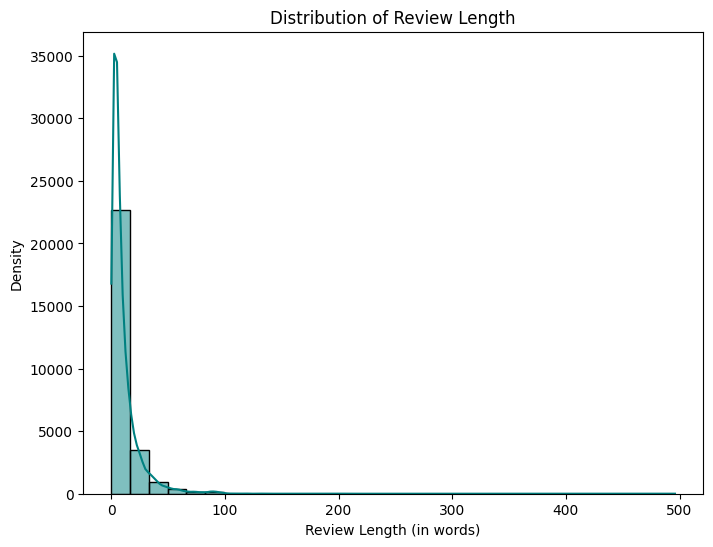

In [33]:
# Create a new column 'review_length' that calculates the number of words in each review
data['review_length'] = data['review_description'].apply(lambda x: len(str(x).split()))

# Set the size of the figure for the histogram
plt.figure(figsize=(8, 6))

# Plot a histogram to show the distribution of review lengths
# 'bins=30' divides the data range into 30 intervals
# 'kde=True' adds a density curve to the histogram
# 'color="teal"' sets the color of the bars to teal
sns.histplot(data['review_length'], bins=30, kde=True, color='teal')

# Add a title to the plot
plt.title('Distribution of Review Length')

# Label the x-axis as 'Review Length (in words)'
plt.xlabel('Review Length (in words)')

# Label the y-axis as 'Density'
plt.ylabel('Density')

# Display the plot
plt.show()


**Role:**

- **Purpose:** This code generates a bar plot to visualize the average review length for each company.
  - It helps in comparing the average number of words in reviews for different companies.
  - The x-axis represents companies, while the y-axis shows the average review length for each company.

- **Method:**
  - `plt.figure(figsize=(14, 8))`: Sets the figure size of the plot to 14 inches wide and 8 inches high for better visibility and readability.
  - `sns.barplot(x='company', y='review_length', data=data)`:
    - `sns.barplot`: Creates a bar plot where the x-axis represents the company names and the y-axis shows the average review length.
    - The `data` argument specifies the DataFrame from which the plot is generated.
  - `plt.title('Review Length vs Company', fontsize=16)`: Adds a title to the plot and sets the font size to 16.
  - `plt.xlabel('Company', fontsize=14)`: Labels the x-axis as 'Company' and sets the font size to 14.
  - `plt.ylabel('Review Length', fontsize=14)`: Labels the y-axis as 'Review Length' and sets the font size to 14.
  - `plt.xticks(rotation=45, ha='right', fontsize=12)`:
    - Rotates the x-axis labels by 45 degrees for better readability and aligns them to the right (`ha='right'`).
    - Sets the font size of the labels to 12.
  - `plt.tight_layout()`: Automatically adjusts the layout to avoid overlapping elements in the plot.
  - `plt.show()`: Displays the plot.

- **Effect:**
  - The plot shows the average review length for each company, with the companies on the x-axis and the average review length on the y-axis.
  - The rotated x-axis labels make the company names easier to read, especially if they are long.
  - The adjusted layout ensures that all plot elements (like titles and labels) are properly spaced and not overlapping.


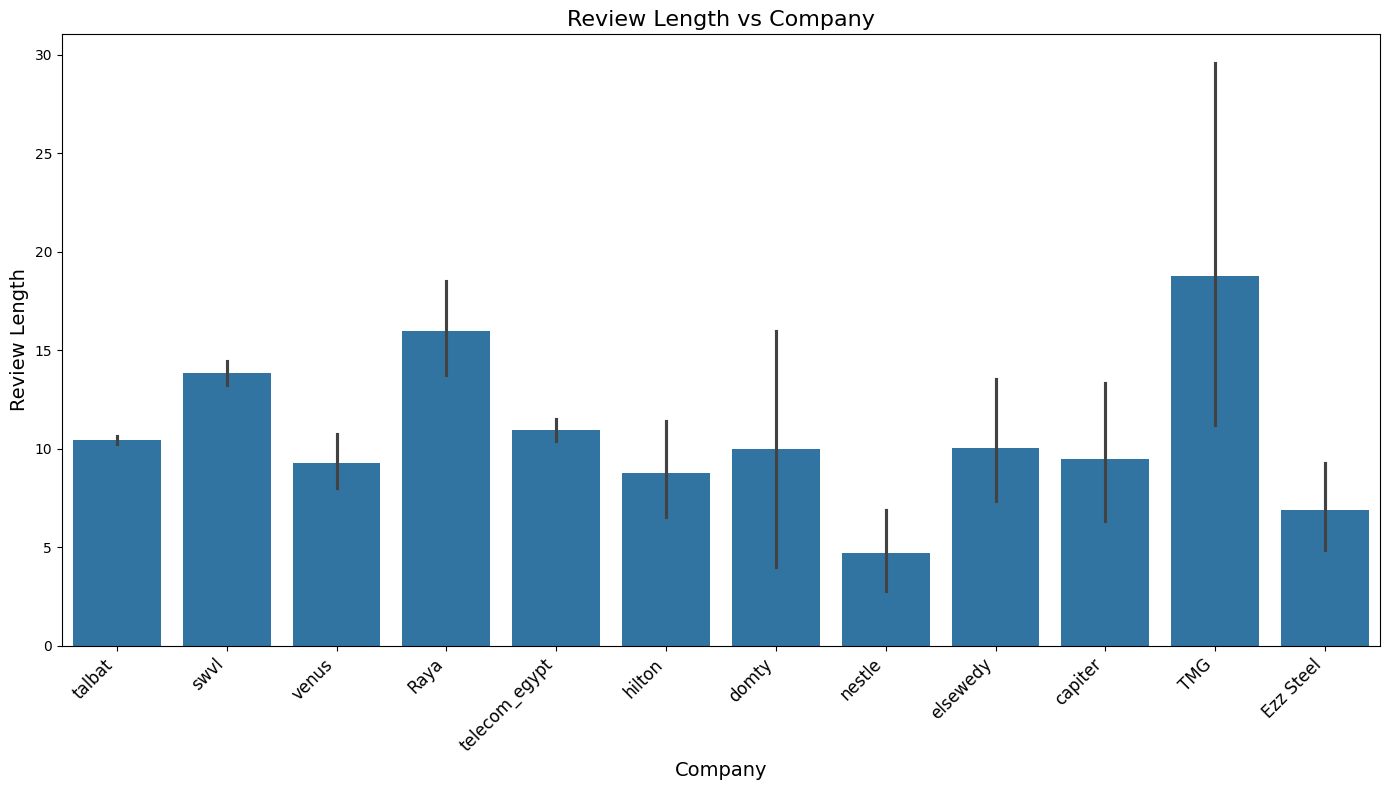

In [34]:
# Set the size of the figure (plot) to 14 inches wide and 8 inches high for better visibility
plt.figure(figsize=(14, 8))

# Create a bar plot with 'company' on the x-axis and 'review_length' on the y-axis
# This will display the average review length for each company
sns.barplot(x='company', y='review_length', data=data)

# Add a title to the plot: "Review Length vs Company", with a font size of 16
plt.title('Review Length vs Company', fontsize=16)

# Label the x-axis as 'Company', with a font size of 14
plt.xlabel('Company', fontsize=14)

# Label the y-axis as 'Review Length', with a font size of 14
plt.ylabel('Review Length', fontsize=14)

# Rotate the x-axis labels by 45 degrees for better readability and align them to the right
# The font size of the labels is set to 12
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust the layout of the plot to make sure elements do not overlap
plt.tight_layout()

# Display the plot
plt.show()


**Role:**

- **Purpose:** This code creates a bar plot to visualize the average review length for each rating.
  - It helps in comparing how review length varies across different ratings.
  - The x-axis represents the ratings, while the y-axis shows the average review length for each rating.

- **Method:**
  - `plt.figure(figsize=(14, 8))`: Sets the figure size of the plot to 14 inches wide and 8 inches high for better visibility and readability.
  - `sns.barplot(x='rating', y='review_length', data=data)`:
    - `sns.barplot`: Creates a bar plot where the x-axis represents the rating values and the y-axis shows the average review length for each rating.
    - The `data` argument specifies the DataFrame that contains the data to be visualized.
  - `plt.title('Review Length vs Rating', fontsize=16)`: Adds a title to the plot with font size 16.
  - `plt.xlabel('Rating', fontsize=14)`: Labels the x-axis as 'Rating' with font size 14.
  - `plt.ylabel('Review Length', fontsize=14)`: Labels the y-axis as 'Review Length' with font size 14.
  - `plt.xticks(rotation=45, ha='right', fontsize=12)`:
    - Rotates the x-axis labels by 45 degrees for better readability, especially if ratings are numeric or long.
    - Aligns the labels to the right (`ha='right'`) and sets their font size to 12.
  - `plt.tight_layout()`: Automatically adjusts the layout to ensure that elements do not overlap and are well-spaced.
  - `plt.show()`: Displays the plot.

- **Effect:**
  - The plot shows the average review length for each rating, with ratings on the x-axis and the average review length on the y-axis.
  - The rotated x-axis labels make the ratings easier to read, especially if they are long or contain numbers.
  - The adjusted layout ensures that all plot elements (like titles and labels) are properly spaced and do not overlap.


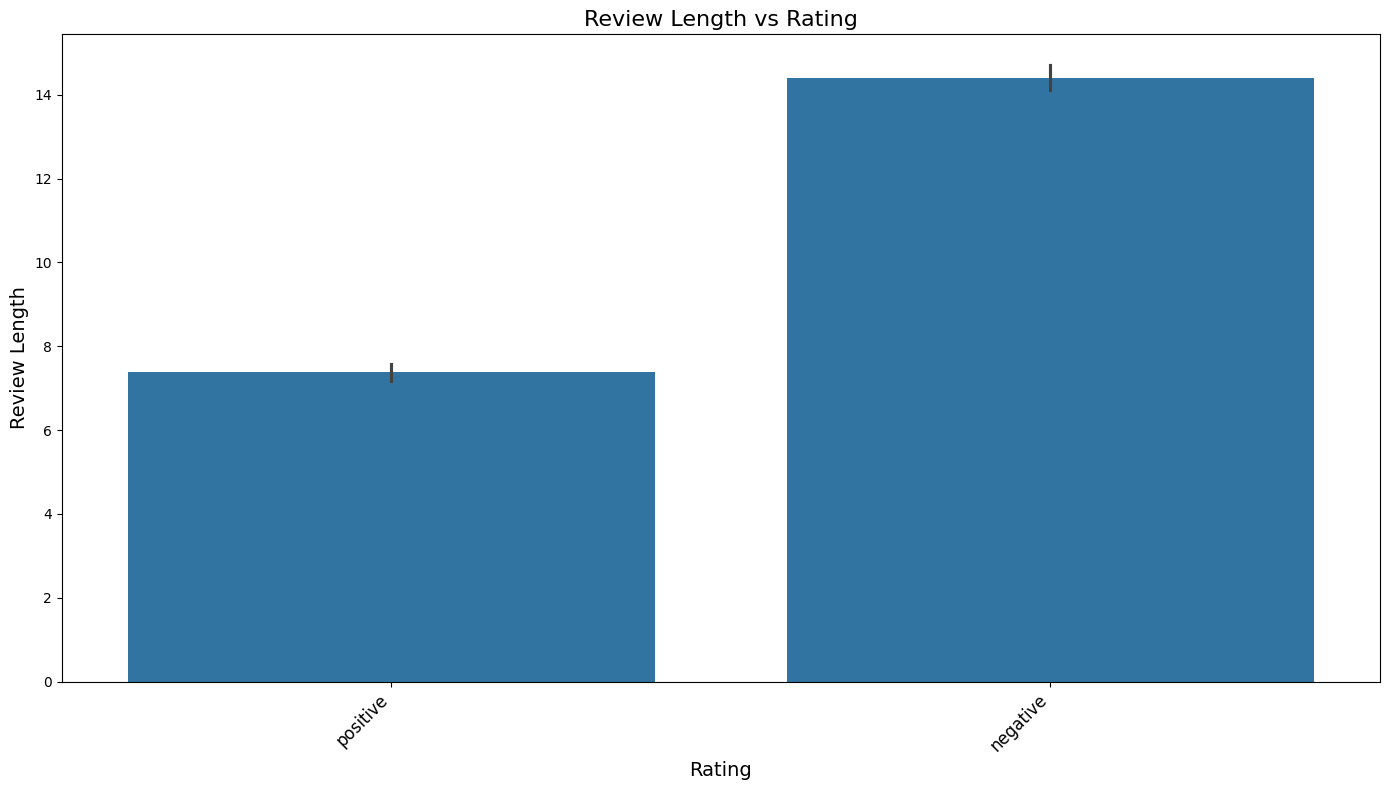

In [35]:
# Set the size of the figure (plot) to 14 inches wide and 8 inches high for better visibility
plt.figure(figsize=(14, 8))

# Create a bar plot with 'rating' on the x-axis and 'review_length' on the y-axis
# This will display the average review length for each rating
sns.barplot(x='rating', y='review_length', data=data)

# Add a title to the plot: "Review Length vs Rating", with a font size of 16
plt.title('Review Length vs Rating', fontsize=16)

# Label the x-axis as 'Rating', with a font size of 14
plt.xlabel('Rating', fontsize=14)

# Label the y-axis as 'Review Length', with a font size of 14
plt.ylabel('Review Length', fontsize=14)

# Rotate the x-axis labels by 45 degrees for better readability and align them to the right
# The font size of the labels is set to 12
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust the layout of the plot to make sure elements do not overlap
plt.tight_layout()

# Display the plot
plt.show()


**Role:**

- **Purpose:** This code creates a bar plot to visualize the average review length for each company, with the data further differentiated by the ratings.
  - It helps to compare how review length varies by company and how each company is rated (Positive, Negative, etc.).
  - The x-axis represents the companies, the y-axis shows the average review length, and the colors (hue) represent different ratings.

- **Method:**
  - `plt.figure(figsize=(14, 8))`: Sets the size of the figure to 14 inches wide and 8 inches high, providing better visibility and readability.
  - `sns.barplot(x='company', y='review_length', hue='rating', data=data)`:
    - `sns.barplot`: Creates a bar plot, where:
      - `x='company'`: The x-axis represents the different companies.
      - `y='review_length'`: The y-axis represents the average review length.
      - `hue='rating'`: The hue differentiates the data by ratings (Positive, Negative, etc.), using different colors for each rating.
    - The `data` argument specifies the DataFrame containing the data.
  - `plt.title('Review Length vs Company vs Rating', fontsize=16)`: Adds a title to the plot with font size 16.
  - `plt.xlabel('Company', fontsize=14)`: Labels the x-axis as 'Company' with font size 14.
  - `plt.ylabel('Review Length', fontsize=14)`: Labels the y-axis as 'Review Length' with font size 14.
  - `plt.xticks(rotation=45, ha='right', fontsize=12)`:
    - Rotates the x-axis labels by 45 degrees to make them more readable, especially if company names are long.
    - Aligns the labels to the right (`ha='right'`) and sets their font size to 12.
  - `plt.tight_layout()`: Adjusts the layout to ensure there is no overlap between elements such as titles, labels, and the plot.
  - `plt.show()`: Displays the plot.

- **Effect:**
  - The plot visualizes the average review length for each company, with the reviews further divided based on the rating (Positive, Negative).
  - The x-axis represents different companies, while the y-axis shows the average length of their reviews.
  - The ratings are represented by different colors, which allows for easy comparison between companies and how their reviews are rated.
  - The rotated x-axis labels improve readability, and the adjusted layout ensures proper spacing for all plot elements.


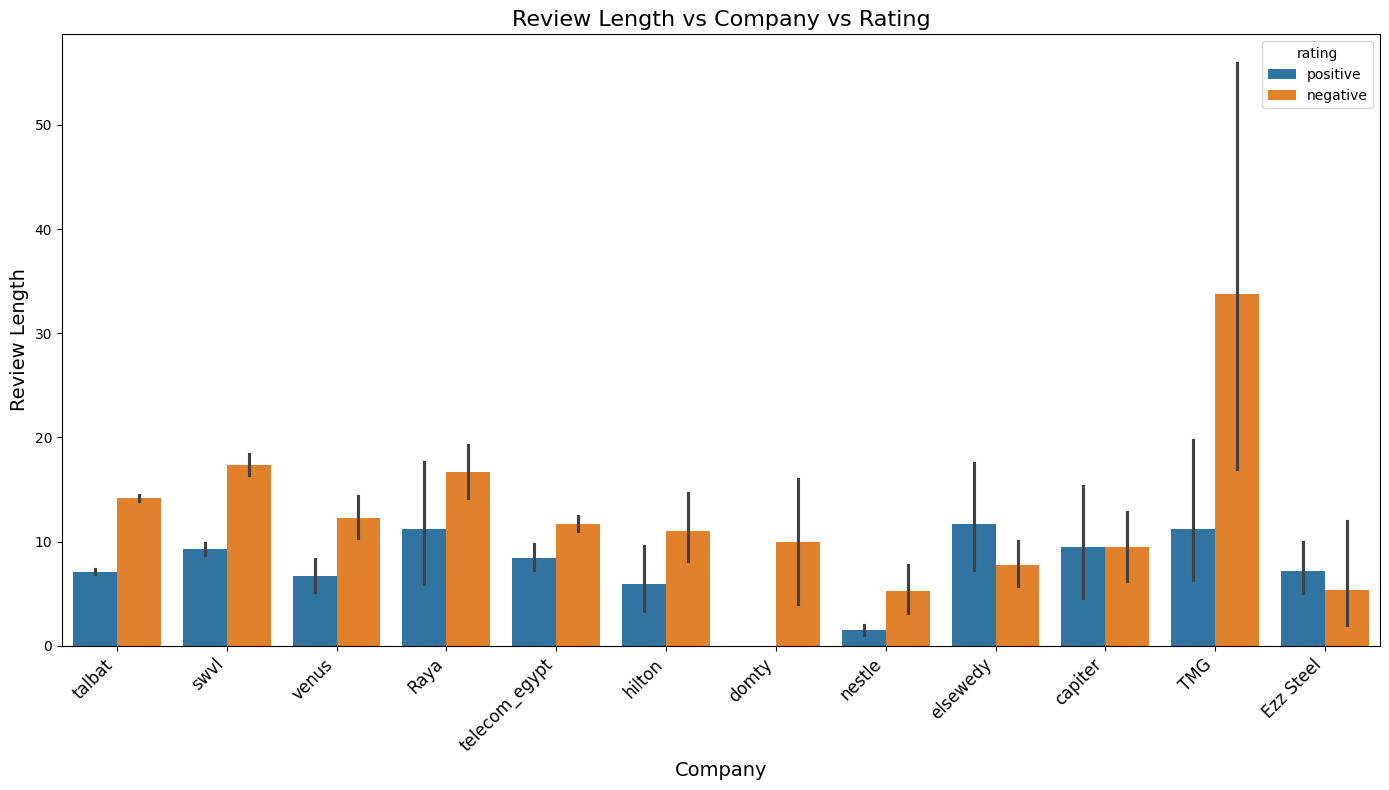

In [36]:
# Set the size of the figure (plot) to 14 inches wide and 8 inches high for better visibility
plt.figure(figsize=(14, 8))

# Create a bar plot with 'company' on the x-axis, 'review_length' on the y-axis,
# and use 'rating' as the hue to differentiate the data by rating
# This will display the average review length for each company, divided by the ratings (e.g., Positive, Negative)
sns.barplot(x='company', y='review_length', hue='rating', data=data)

# Add a title to the plot: "Review Length vs Company vs Rating", with a font size of 16
plt.title('Review Length vs Company vs Rating', fontsize=16)

# Label the x-axis as 'Company', with a font size of 14
plt.xlabel('Company', fontsize=14)

# Label the y-axis as 'Review Length', with a font size of 14
plt.ylabel('Review Length', fontsize=14)

# Rotate the x-axis labels by 45 degrees for better readability and align them to the right
# The font size of the labels is set to 12
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust the layout of the plot to make sure elements do not overlap
plt.tight_layout()

# Display the plot
plt.show()


**Role:**

- **Purpose:**
  - `data.info()` provides general information about the DataFrame, including:
    - The number of entries (rows).
    - The data types of each column.
    - The memory usage of the DataFrame.
  - `data.describe()` generates descriptive statistics for numerical columns in the DataFrame, including:
    - Count: The number of non-null entries.
    - Mean: The average value of the numerical data.
    - Standard Deviation: The spread or variability of the data.
    - Minimum and Maximum: The smallest and largest values in the data.
    - Percentiles (25%, 50%, 75%): The values at these percentiles help describe the distribution of the data.

- **Method:**
  - `data.info()`:
    - This method displays essential details about the DataFrame, such as the number of rows, column names, data types, and memory consumption.
    - It is especially useful for checking for missing data (null values) and understanding the structure of the DataFrame.
  - `data.describe()`:
    - This method provides a summary of statistics for numerical columns, which is helpful for understanding the central tendency, spread, and overall distribution of the numerical data.

- **Effect:**
  - `data.info()` helps you get an overview of the DataFrame's structure and size, highlighting the presence of any missing data and the types of each column.
  - `data.describe()` provides a statistical summary of numerical columns, helping to quickly assess the distribution and variability of the data.


In [37]:
# Display general information about the DataFrame (like the number of entries, column data types, and memory usage)
data.info()

# Display basic statistical details about the DataFrame such as count, mean, standard deviation, min, max, and percentiles for numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 27715 entries, 0 to 40037
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_description  27715 non-null  object
 1   rating              27715 non-null  object
 2   company             27715 non-null  object
 3   review_length       27715 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


,review_length
count,27715.000000
mean,10.902580
std,15.775477
min,0.000000
25%,3.000000
50%,6.000000
75%,13.000000
max,496.000000


# Modeling
**Role:**

- **Purpose:**
  - This code imports necessary libraries and modules to perform:
    - Text preprocessing and feature extraction using **TF-IDF Vectorizer**.
    - Splitting data into training and testing sets.
    - Applying various machine learning classifiers.
    - Evaluating the performance of models using metrics like accuracy, classification reports, and confusion matrices.
    - Visualizing classification performance using the **Yellowbrick library**.

---

**Imports and Their Usage:**

1. **`TfidfVectorizer` (from `sklearn.feature_extraction.text`)**:
   - Converts raw text into numerical feature vectors using Term Frequency-Inverse Document Frequency (TF-IDF).
   - Useful for text classification and NLP tasks.

2. **`train_test_split` (from `sklearn.model_selection`)**:
   - Splits the dataset into training and testing subsets.
   - Helps in evaluating the model on unseen data.

3. **`LogisticRegression` (from `sklearn.linear_model`)**:
   - Implements logistic regression, a statistical model used for binary or multi-class classification tasks.

4. **`DecisionTreeClassifier` (from `sklearn.tree`)**:
   - A decision tree-based algorithm for classification tasks.
   - Splits data into branches based on feature conditions.

5. **`RandomForestClassifier` (from `sklearn.ensemble`)**:
   - An ensemble learning method combining multiple decision trees.
   - Increases accuracy and reduces overfitting.

6. **`GradientBoostingClassifier` (from `sklearn.ensemble`)**:
   - Another ensemble learning method, building models sequentially to correct errors made by previous models.

7. **`MultinomialNB` (from `sklearn.naive_bayes`)**:
   - A Naive Bayes algorithm optimized for multi-class classification tasks.
   - Works well for text data like word counts or TF-IDF features.

8. **`LinearSVC` (from `sklearn.svm`)**:
   - A linear Support Vector Classifier (SVC).
   - Finds a hyperplane that best separates classes.

9. **`accuracy_score`, `classification_report`, and `confusion_matrix` (from `sklearn.metrics`)**:
   - **`accuracy_score`**: Calculates the percentage of correct predictions.
   - **`classification_report`**: Provides detailed performance metrics like precision, recall, and F1-score.
   - **`confusion_matrix`**: Displays a matrix comparing predicted and actual class labels.

10. **`ClassificationReport` (from `yellowbrick.classifier`)**:
    - A visualization tool for classification performance.
    - Displays precision, recall, and F1-scores for each class in a graphical format.

---

**Effect:**
- The imported modules and libraries allow for:
  - Efficient text feature extraction.
  - Implementation of multiple classification algorithms.
  - Comprehensive model evaluation through numerical and visual reports


In [49]:
# Importing TfidfVectorizer from sklearn. This tool converts text into numerical representations using the TF-IDF (Term Frequency-Inverse Document Frequency) method.
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing train_test_split from sklearn. This tool is used to split the dataset into two parts: a training set and a testing set.
from sklearn.model_selection import train_test_split

# Importing LogisticRegression from sklearn. This algorithm is used for classification using logistic regression.
from sklearn.linear_model import LogisticRegression

# Importing DecisionTreeClassifier from sklearn. This algorithm is used to build a decision tree for classification.
from sklearn.tree import DecisionTreeClassifier

# Importing RandomForestClassifier and GradientBoostingClassifier from sklearn. These algorithms build ensemble models with multiple trees (Random Forest and Gradient Boosting).
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Importing MultinomialNB from sklearn. This algorithm is used for classification based on Naive Bayes theory.
from sklearn.naive_bayes import MultinomialNB

# Importing LinearSVC from sklearn. This is a linear Support Vector Classifier used for classification tasks.
from sklearn.svm import LinearSVC

# Importing evaluation metrics to assess model performance:
# - accuracy_score to calculate the accuracy of the model.
# - classification_report to display detailed performance metrics such as precision, recall, and F1 score.
# - confusion_matrix to generate a confusion matrix showing classification results.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing ClassificationReport from the Yellowbrick library for visualizing classification results.
from yellowbrick.classifier import ClassificationReport

# Code Explanation:

### Role:
- This code defines a mapping dictionary `rating_mapping` where the text values 'positive' and 'negative' are mapped to numerical values 1 and -1, respectively.
- The `map()` function is then used on the 'rating' column of the `data` DataFrame to convert the text ratings into their corresponding numerical values using the `rating_mapping`.
- Finally, the `drop()` function removes the original 'rating' column from the DataFrame, leaving only the new 'rating_numeric' column.

### Effect:
- The 'rating_numeric' column in the `data` DataFrame will now contain numerical values (1 for 'positive' and -1 for 'negative') instead of the original text ratings.
- This conversion allows for easier analysis or model training, as most algorithms require numerical inputs.
- The original 'rating' column is removed, ensuring the DataFrame only contains relevant columns for further processing.


In [39]:
# Mapping text ratings to numerical values: 'positive' -> 1, 'negative' -> -1
rating_mapping = {'positive': 1, 'negative': -1}

# Apply the mapping to the 'rating' column and store the result in 'rating_numeric'
data['rating_numeric'] = data['rating'].map(rating_mapping)

# Drop the original 'rating' column as it's no longer needed
data.drop(columns='rating', axis=1, inplace=True)


# Code Explanation:
### Role:
- This line assigns the 'review_description' column from the `data` DataFrame to the variable `X`, which will be used as the feature (input) for modeling.
- It also assigns the 'rating_numeric' column from the `data` DataFrame to the variable `y`, which will be used as the target (output) for modeling.

### Effect:
- `X` now contains the textual descriptions of the reviews, which could be used to predict the numerical ratings.
- `y` holds the numerical ratings that correspond to each review description, serving as the target variable for training a model.
- This setup is typically used in supervised machine learning tasks where `X` is the input data and `y` is the label or output that the model will learn to predict.


In [40]:
# Assign the 'review_description' column to X (features) for model input
X = data['review_description']

# Assign the 'rating_numeric' column to y (target) for model output
y = data['rating_numeric']


# Code Explanation:
### Role:
- The `TfidfVectorizer()` is initialized and assigned to `VecModel`. This vectorizer converts the 'review_description' text into numerical features based on the Term Frequency-Inverse Document Frequency (TF-IDF) method, which helps in capturing the importance of words in relation to the entire dataset.
- `VecModel.fit_transform(X)` is applied to the `X` variable (which contains the review descriptions). This fits the vectorizer to the text data and transforms it into a sparse matrix of TF-IDF features.
- `pd.DataFrame.sparse.from_spmatrix(X)` converts the sparse matrix resulting from the transformation into a sparse pandas DataFrame, making it easier to work with and more memory efficient for large datasets.

### Effect:
- The `X` variable now contains a sparse matrix of TF-IDF features representing the review descriptions, with each column corresponding to a term (word) and its importance in the context of the dataset.
- The transformation reduces the dimensionality of the text data and ensures that less important words have lower weights.
- The conversion to a sparse pandas DataFrame (`X_vec`) allows for efficient handling of the large, sparse matrix and makes it easier to process further in analysis or machine learning models.


In [41]:
# Initialize the TfidfVectorizer, which converts text into TF-IDF features
VecModel = TfidfVectorizer()

# Fit the vectorizer on X (text data) and transform it into a sparse matrix of TF-IDF features
X = VecModel.fit_transform(X)

# Convert the sparse matrix into a pandas DataFrame for easier manipulation
X_vec = pd.DataFrame.sparse.from_spmatrix(X)


# Code Explanation:
### Role:
- The `print(f"the shape of X is {X_vec.shape}")` line prints the dimensions (shape) of the `X_vec` DataFrame, which represents the number of rows (documents) and columns (terms/words) in the TF-IDF transformed data.
- `X_vec.head()` displays the first few rows (by default, the first 5) of the `X_vec` DataFrame, allowing you to quickly inspect the structure and values of the transformed data.

### Effect:
- The `print()` statement provides insight into the size of the `X_vec` DataFrame, helping you understand the number of documents and the number of terms/features resulting from the TF-IDF transformation.
- The `head()` function gives you a preview of the top rows in the transformed DataFrame, showing how each document is represented as a vector of TF-IDF values for each term.


In [42]:
# Print the shape of the transformed feature matrix X_vec to see the number of rows and columns
print(f"the shape of X is {X_vec.shape}")

# Display the first few rows of the transformed feature matrix X_vec for inspection
X_vec.head()


the shape of X is (27715, 40522)


,0,1,2,3,4,5,6,7,8,9,...,40512,40513,40514,40515,40516,40517,40518,40519,40520,40521
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Code Explanation:
### Role:
- The `for i in range(5):` loop iterates over the first 5 rows (documents) in the `X_vec` DataFrame.
- `X_vec.iloc[i,:]` selects the i-th row (document) and all of its columns (terms/words).
- `sorted(list(X_vec.iloc[i,:]), reverse=True)` sorts the values in the row in descending order, allowing you to view the terms with the highest TF-IDF values first.
- `[:20]` slices the sorted list to keep only the top 20 values, which correspond to the most important words in the current document based on their TF-IDF scores.
- The `print()` function then outputs these top 20 values for each document.

### Effect:
- This loop prints the top 20 words (with the highest TF-IDF values) for the first 5 review descriptions (documents), providing insight into the most important terms in each document according to the TF-IDF method.
- It helps to understand which terms are considered most significant in each review and how they are weighted relative to the entire dataset.


In [43]:
# Loop through the first 5 rows of the feature matrix X_vec
for i in range(5):
    # For each row, sort the values in descending order and print the top 20 values (highest TF-IDF scores)
    print(sorted(list(X_vec.iloc[i,:]), reverse=True)[:20])


[1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.49237034082185493, 0.47838909682113995, 0.4292256607509511, 0.3310084531234133, 0.30809331066668216, 0.21410042194711368, 0.1935224169679076, 0.18568116399880963, 0.1490810395282936, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.3965813830053352, 0.3704924360131215, 0.3552313803393745, 0.28382683003365966, 0.2777569558825898, 0.264978452217558, 0.26067223029103226, 0.2528888205931927, 0.24034290565905428, 0.20836739387785028, 0.19577560521261866, 0.19206481091651317, 0.15918898031601053, 0.13306573865677931, 0, 0, 0, 0, 0, 0]
[0.6235616075160817, 0.5024728631690957, 0.4424788190839258, 0.3501998875995235, 0.20066010265617534, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.4138725638137149, 0.35065472697949257, 0.3321932426838902, 0.327566789763626, 0.31626679603545405, 0.2809355739500042, 0.279626137679843, 0.24030293283762144, 0.23106755855306915, 0.17039972581714186, 0.16612971318775177, 0.15903990046961392, 0.15765947117501905

# Code Explanation:
### Role:
- The `train_test_split(X_vec, y, test_size=0.2, random_state=42)` function splits the data into training and testing sets.
  - `X_vec` represents the input features (TF-IDF vectors of review descriptions).
  - `y` represents the target variable (numerical ratings).
  - `test_size=0.2` means 20% of the data will be used for testing, while 80% will be used for training.
  - `random_state=42` ensures the split is reproducible, meaning you'll get the same split each time the code runs.

### Effect:
- `X_train` and `y_train` will contain 80% of the data and will be used to train the model.
- `X_test` and `y_test` will contain the remaining 20% of the data and will be used to evaluate the model's performance.
- This division helps assess how well the model generalizes to unseen data by training on one subset and testing on another.


In [44]:
# Split the data into training and testing sets, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


# Code Explanation:
### Role:
- The `data['rating_numeric'].value_counts()` function counts the occurrences of each unique value in the 'rating_numeric' column of the `data` DataFrame.
  - It returns a Series with the unique values as the index and their respective counts as the values.

### Effect:
- This function provides an overview of the distribution of the numerical ratings in the dataset, showing how many times each rating (e.g., 1 for 'positive' and -1 for 'negative') appears.
- It helps to assess if the dataset is balanced or if there is a bias toward a certain rating, which could influence the model's performance.


In [45]:
# Count the occurrences of each unique value in the 'rating_numeric' column
data['rating_numeric'].value_counts()


,count
rating_numeric,
-1,13892
1,13823


# Code Explanation:
### Role:
- The `evaluate_model()` function is designed to evaluate the performance of a machine learning model on the test set.
  - `model.predict(X_test)` makes predictions using the trained model on the test data (`X_test`).
  - `accuracy_score(y_test, y_pred)` computes the accuracy of the model by comparing the predicted labels (`y_pred`) with the actual labels (`y_test`).
  - `confusion_matrix(y_test, y_pred)` generates the confusion matrix, which shows the true positive, true negative, false positive, and false negative counts, helping to assess the model's classification performance.
  - `classification_report(y_test, y_pred)` provides detailed performance metrics such as precision, recall, and F1-score for each class in the dataset.
  - `ClassificationReport(model, support=True)` from Yellowbrick visualizes the classification report, providing a graphical representation of the metrics.

### Effect:
- The function prints the accuracy of the model, providing a measure of overall performance.
- It prints the confusion matrix, helping to understand how well the model is distinguishing between different classes and where it is making errors.
- The classification report provides detailed metrics for precision, recall, and F1-score, offering more in-depth performance insights for each class.
- The Yellowbrick visualization gives a graphical representation of the classification report, making it easier to interpret the model's performance visually.


In [46]:
# Define a function to evaluate a model's performance using various metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predict the labels for the test data using the trained model
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model (correct predictions / total predictions)
    acc = accuracy_score(y_test, y_pred)
    print(f"The accuracy of the model is: {acc}")

    # Generate and print the confusion matrix to visualize the performance of the model
    cm = confusion_matrix(y_test, y_pred)
    print(f"The confusion matrix of the model is: \n{cm}")

    # Generate and print the classification report, which includes precision, recall, and F1-score
    cr = classification_report(y_test, y_pred)
    print(f"The classification report of the model is: \n{cr}")

    # Visualize the classification report using Yellowbrick for better interpretability
    visualizer = ClassificationReport(model, support=True)
    visualizer.fit(X_train, y_train)  # Fit the visualizer to the training data
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show()  # Display the visual report


## LogisticRegression

### Role:
- The `LogisticRegression()` function initializes a logistic regression model with the following parameters:
  - `C=1`: Regularization strength. A smaller value increases regularization, while a larger value reduces it. Here, `C=1` is a balanced choice.
  - `penalty='l2'`: Specifies the type of regularization. 'l2' applies L2 regularization (Ridge regularization), which penalizes large coefficients.
  - `solver='lbfgs'`: Specifies the optimization algorithm. 'lbfgs' is an efficient solver for large datasets, commonly used in logistic regression.
  - `max_iter=2000`: Sets the maximum number of iterations for the optimization algorithm to converge. A larger value helps ensure the model converges, especially for complex datasets.

- `log_model.fit(X_train, y_train)` fits the logistic regression model to the training data (`X_train` and `y_train`), training the model to learn the relationship between the features and the target variable.

### Effect:
- The logistic regression model (`log_model`) is trained on the training data, learning the optimal coefficients that minimize the error in predicting the target variable (`y_train`).
- After fitting, the model can be used to make predictions on new data, evaluate its performance, and interpret the learned coefficients to understand feature importance.


In [47]:
# Initialize a Logistic Regression model with specific hyperparameters
log_model = LogisticRegression(
    C=1,  # Regularization strength (C=1 means moderate regularization)
    penalty='l2',  # Use L2 regularization (Ridge regularization)
    solver='lbfgs',  # Optimization algorithm (LBFGS is efficient for large datasets)
    max_iter=2000  # Maximum number of iterations for the solver to converge
)

# Train the model on the training data (X_train and y_train)
log_model.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=2000)

# Code Explanation:
### Role:
- The `evaluate_model(log_model, X_train, y_train, X_test, y_test)` function evaluates the logistic regression model (`log_model`) by performing several tasks:
  - It uses the trained model (`log_model`) to predict the target variable (`y_pred`) for the test data (`X_test`).
  - It calculates the accuracy of the model using `accuracy_score(y_test, y_pred)` and prints the result.
  - It generates the confusion matrix using `confusion_matrix(y_test, y_pred)` and prints it, showing the counts of true positives, false positives, true negatives, and false negatives.
  - It provides a detailed classification report using `classification_report(y_test, y_pred)`, including precision, recall, and F1-score for each class.
  - It visualizes the classification report using Yellowbrick’s `ClassificationReport`, which shows the same metrics in a graphical form.

### Effect:
- The accuracy of the logistic regression model is printed, providing an overall measure of its prediction performance.
- The confusion matrix is printed, giving a detailed view of how the model's predictions compare to the actual values for each class.
- The classification report provides precision, recall, and F1-score for each class, helping to assess how well the model performs across all classes.
- The Yellowbrick visualization makes it easier to interpret the classification report visually, providing a clearer understanding of the model's performance.


The accuracy of the model is: 0.8621685008118347
The confusion matrix of the model is: 
[[2361  426]
 [ 338 2418]]
The classification report of the model is: 
              precision    recall  f1-score   support

          -1       0.87      0.85      0.86      2787
           1       0.85      0.88      0.86      2756

    accuracy                           0.86      5543
   macro avg       0.86      0.86      0.86      5543
weighted avg       0.86      0.86      0.86      5543



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


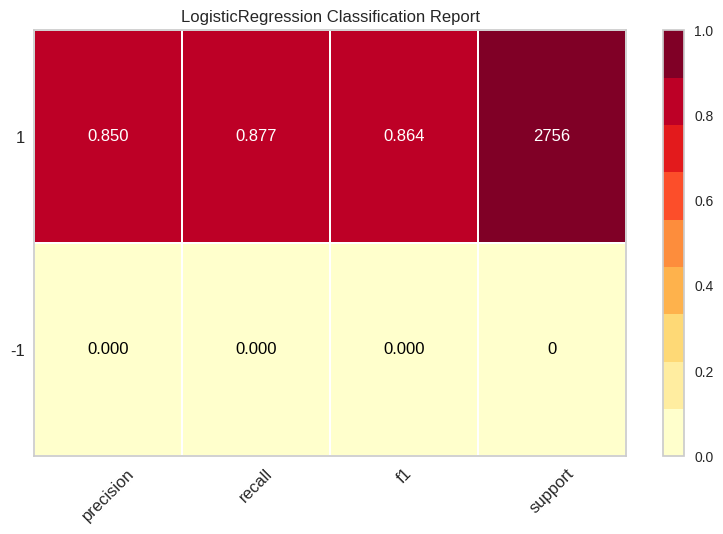

In [50]:
# Evaluate the trained logistic regression model using the evaluation function
evaluate_model(log_model, X_train, y_train, X_test, y_test)


## Naive Base

### Role:
- The `MultinomialNB()` function initializes a multinomial Naive Bayes model, which is commonly used for classification tasks involving text data. It assumes that the features (in this case, TF-IDF values) follow a multinomial distribution.
- `bayes_model.fit(X_train, y_train)` trains the Naive Bayes model on the training data (`X_train` and `y_train`), learning the relationship between the features (TF-IDF values of the review descriptions) and the target variable (numerical ratings).

### Effect:
- The Naive Bayes model (`bayes_model`) is trained on the provided data and is now ready to make predictions on new data or be evaluated using performance metrics.
- Once trained, the model can classify new instances based on the learned probability distributions, making it suitable for tasks like sentiment analysis or text classification.


In [51]:
# Initialize a Multinomial Naive Bayes model
bayes_model = MultinomialNB()

# Train the model on the training data (X_train and y_train)
bayes_model.fit(X_train, y_train)


MultinomialNB()

# Code Explanation:
### Role:
- The `evaluate_model(bayes_model, X_train, y_train, X_test, y_test)` function evaluates the performance of the multinomial Naive Bayes model (`bayes_model`) on the test set.
  - It uses the trained model to make predictions on the test data (`X_test`) by calling `bayes_model.predict(X_test)`.
  - It calculates the accuracy using `accuracy_score(y_test, y_pred)` and prints the result.
  - It generates the confusion matrix with `confusion_matrix(y_test, y_pred)`, providing an overview of how well the model distinguishes between classes.
  - It generates a detailed classification report using `classification_report(y_test, y_pred)`, showing precision, recall, and F1-score for each class.
  - It visualizes the classification report using Yellowbrick's `ClassificationReport`, which presents the performance metrics in a graphical form.

### Effect:
- The accuracy of the Naive Bayes model is printed, giving an overall measure of how well it performs on the test data.
- The confusion matrix is printed, showing the model's performance across different classes, highlighting areas where the model made errors.
- The classification report provides a breakdown of the precision, recall, and F1-score for each class, helping to understand the model's strengths and weaknesses.
- The Yellowbrick visualization gives a clear graphical representation of the classification report, making it easier to interpret the model's performance.


The accuracy of the model is: 0.8563954537254195
The confusion matrix of the model is: 
[[2453  334]
 [ 462 2294]]
The classification report of the model is: 
              precision    recall  f1-score   support

          -1       0.84      0.88      0.86      2787
           1       0.87      0.83      0.85      2756

    accuracy                           0.86      5543
   macro avg       0.86      0.86      0.86      5543
weighted avg       0.86      0.86      0.86      5543



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


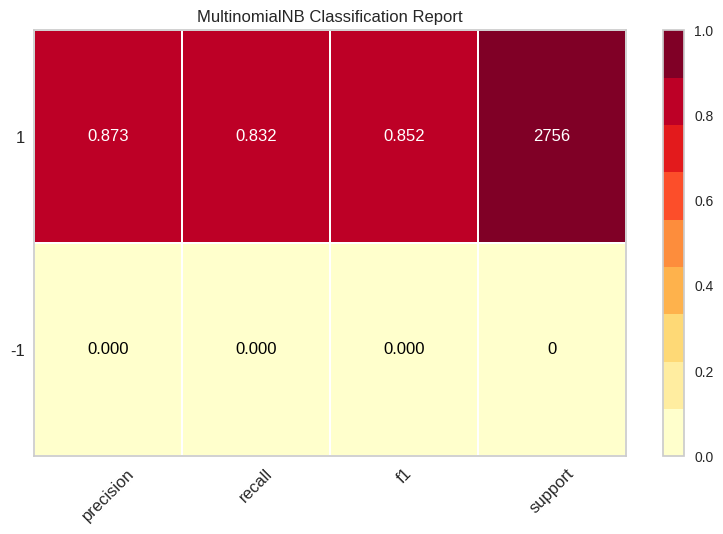

In [52]:
# Evaluate the trained Multinomial Naive Bayes model using the evaluation function
evaluate_model(bayes_model, X_train, y_train, X_test, y_test)

## RandomForest

### Role:
- The `RandomForestClassifier()` initializes a Random Forest model, which is an ensemble learning method that creates a collection of decision trees. Each tree is trained on a subset of the data and the final prediction is made by averaging the predictions of all trees (for regression) or by majority voting (for classification).
- `RF_model.fit(X_train, y_train)` trains the Random Forest classifier on the training data (`X_train` and `y_train`), learning the relationship between the features and the target variable. It constructs multiple decision trees using a random subset of features and data points for each tree.

### Effect:
- The Random Forest model (`RF_model`) is trained using the provided data, learning to classify the review descriptions based on their TF-IDF features.
- Once trained, the model is ready to make predictions on new, unseen data and can be evaluated using metrics such as accuracy, confusion matrix, and classification report.
- Random Forest models are often robust and handle overfitting better than single decision trees due to the ensemble approach.


In [53]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier() # Initialize a Random Forest classifier model
RF_model.fit(X_train,y_train)  # Train the model on the training data (X_train and y_train)

RandomForestClassifier()

# Code Explanation:
### Role:
- The `evaluate_model(RF_model, X_train, y_train, X_test, y_test)` function evaluates the performance of the Random Forest model (`RF_model`) on the test set.
  - It uses the trained model to make predictions on the test data (`X_test`) by calling `RF_model.predict(X_test)`.
  - It calculates the accuracy of the model using `accuracy_score(y_test, y_pred)` and prints the result, showing how well the model predicts the target labels on the test set.
  - It generates the confusion matrix with `confusion_matrix(y_test, y_pred)`, which gives insights into the types of errors the model is making, such as false positives and false negatives.
  - The `classification_report(y_test, y_pred)` provides detailed metrics such as precision, recall, and F1-score for each class, helping to assess the model’s performance across different categories.
  - The Yellowbrick visualization (`ClassificationReport`) graphically presents the classification report, making it easier to interpret the performance metrics.

### Effect:
- The accuracy score is printed, providing a quick assessment of the Random Forest model’s performance on the test data.
- The confusion matrix is printed, helping to understand how well the model distinguishes between different classes (e.g., correct vs. incorrect classifications).
- The classification report provides precision, recall, and F1-score for each class, which allows for more detailed evaluation of the model’s strengths and weaknesses.
- The Yellowbrick visualization displays a graphical summary of the classification metrics, making it easier to analyze the model's performance visually.


The accuracy of the model is: 0.8374526429731193
The confusion matrix of the model is: 
[[2267  520]
 [ 381 2375]]
The classification report of the model is: 
              precision    recall  f1-score   support

          -1       0.86      0.81      0.83      2787
           1       0.82      0.86      0.84      2756

    accuracy                           0.84      5543
   macro avg       0.84      0.84      0.84      5543
weighted avg       0.84      0.84      0.84      5543



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


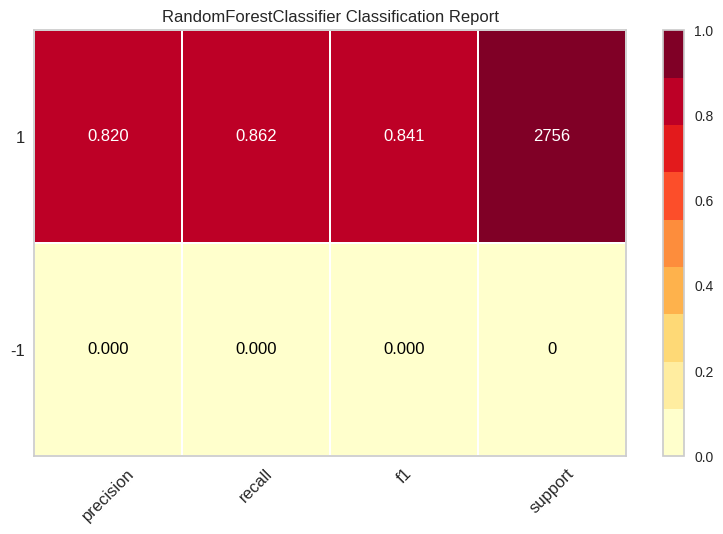

In [54]:
# Evaluate the trained Random Forest model using the evaluation function
evaluate_model(RF_model, X_train, y_train, X_test, y_test)


## SVC

### Role:
- The `param_grid` dictionary defines the hyperparameters that will be tested during the grid search:
  - `'C'`: Regularization parameter. The values `[0.01, 0.1, 1, 10, 100]` are tested to find the optimal value that minimizes the model's error.
  - `'penalty'`: Specifies the type of regularization. `'l2'` is used here for Ridge regularization, as `'l1'` would require `dual=False`.
  - `'max_iter'`: The maximum number of iterations for the optimization process. The values `[1000, 2000, 3000]` are tested to see which gives the best performance.
  
- `LinearSVC()` initializes the linear support vector classifier, which is a type of support vector machine used for classification tasks.
- `GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)` performs an exhaustive search over the hyperparameter grid defined in `param_grid` using 5-fold cross-validation (`cv=5`) and evaluates the models based on accuracy (`scoring='accuracy'`).
  - `n_jobs=-1` uses all available processors to speed up the process by parallelizing the grid search.
- `grid_search.fit(X_train, y_train)` trains the `LinearSVC` model using all combinations of parameters defined in `param_grid`, performing cross-validation to find the optimal set of parameters.

### Effect:
- The grid search will identify the best hyperparameters for the `LinearSVC` model, based on the cross-validation performance.
- `grid_search.best_params_` prints the optimal hyperparameters that resulted in the highest accuracy score.
- `grid_search.best_score_` provides the best accuracy score achieved during the grid search, representing the model's performance with the best-found hyperparameters.


In [55]:
# Initialize the LinearSVC model
SVC_model = LinearSVC(max_iter=2000)
SVC_model.fit(X_train,y_train) # Train the model on the training data (X_train and y_train)


LinearSVC(max_iter=2000)

# Code Explanation:
### Role:
- The `evaluate_model(SVC_model, X_train, y_train, X_test, y_test)` function evaluates the performance of the support vector classifier (SVC) model (`SVC_model`) on the test data.
  - It uses the trained model to predict the target variable for the test data (`X_test`) by calling `SVC_model.predict(X_test)`.
  - The accuracy of the model is calculated using `accuracy_score(y_test, y_pred)` and printed, giving an overall measure of how well the model predicts the target variable on the test set.
  - The confusion matrix is generated with `confusion_matrix(y_test, y_pred)`, which shows the number of true positives, false positives, true negatives, and false negatives.
  - The `classification_report(y_test, y_pred)` is generated, providing detailed metrics like precision, recall, and F1-score for each class.
  - The `ClassificationReport` from Yellowbrick is used to visualize these metrics, presenting the performance in a graphical format for easier interpretation.

### Effect:
- The accuracy of the model is printed, providing a quick assessment of how well the SVC model performs on the test data.
- The confusion matrix is printed, showing how many of the predictions were correct (true positives and true negatives) and how many were incorrect (false positives and false negatives).
- The classification report is printed, which provides detailed metrics like precision, recall, and F1-score for each class, helping you assess the model's performance on each class individually.
- The Yellowbrick visualization gives a graphical representation of the classification metrics, making it easier to interpret the model’s performance visually.


The accuracy of the model is: 0.8563954537254195
The confusion matrix of the model is: 
[[2324  463]
 [ 333 2423]]
The classification report of the model is: 
              precision    recall  f1-score   support

          -1       0.87      0.83      0.85      2787
           1       0.84      0.88      0.86      2756

    accuracy                           0.86      5543
   macro avg       0.86      0.86      0.86      5543
weighted avg       0.86      0.86      0.86      5543



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


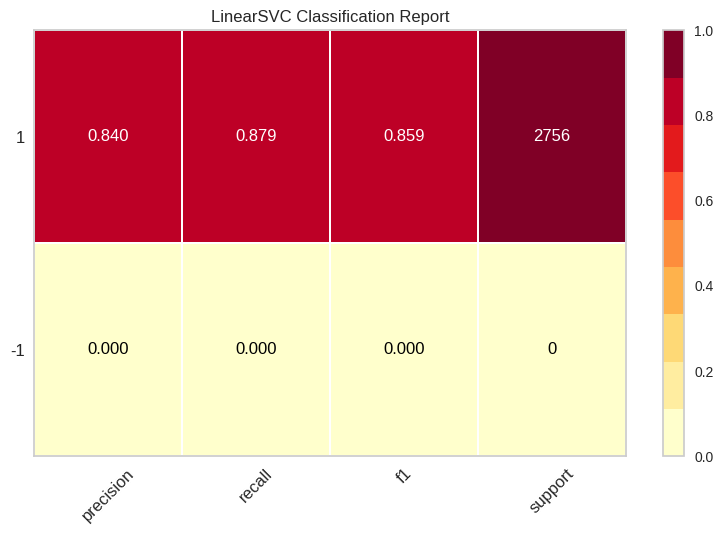

In [56]:
# Evaluate the trained SVC model using the evaluation function
evaluate_model(SVC_model, X_train, y_train, X_test, y_test)


## Conclusion:
### The Best model is LogisticRegression